<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Environment-Map-and-Borders" data-toc-modified-id="Environment-Map-and-Borders-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Environment Map and Borders</a></span></li><li><span><a href="#Oscilação-em-torno-da-posição-de-destino" data-toc-modified-id="Oscilação-em-torno-da-posição-de-destino-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Oscilação em torno da posição de destino</a></span></li><li><span><a href="#Sensibilidade-$U_{0}$" data-toc-modified-id="Sensibilidade-$U_{0}$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sensibilidade $U_{0}$</a></span><ul class="toc-item"><li><span><a href="#Trajetórias" data-toc-modified-id="Trajetórias-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Trajetórias</a></span></li></ul></li><li><span><a href="#Sensibilidade-$V_{0}$" data-toc-modified-id="Sensibilidade-$V_{0}$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sensibilidade $V_{0}$</a></span></li><li><span><a href="#Sensibilidade-$\Delta-t$" data-toc-modified-id="Sensibilidade-$\Delta-t$-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sensibilidade $\Delta t$</a></span></li><li><span><a href="#Sensibilidade-$\tau$" data-toc-modified-id="Sensibilidade-$\tau$-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sensibilidade $\tau$</a></span></li><li><span><a href="#Repulsão-entre-Agentes-como-Sugerido-em-1995---ESSA-IMAGEM-FOI-REMOVIDA-DA-ANÁLISE" data-toc-modified-id="Repulsão-entre-Agentes-como-Sugerido-em-1995---ESSA-IMAGEM-FOI-REMOVIDA-DA-ANÁLISE-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Repulsão entre Agentes como Sugerido em 1995 - ESSA IMAGEM FOI REMOVIDA DA ANÁLISE</a></span></li><li><span><a href="#Uma-Elipse-Didática" data-toc-modified-id="Uma-Elipse-Didática-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Uma Elipse Didática</a></span></li></ul></div>

Potential Planning Algorithm

https://github.com/AtsushiSakai/PythonRobotics/blob/master/PathPlanning/PotentialFieldPlanning/potential_field_planning.py

https://www.cs.cmu.edu/~motionplanning/lecture/Chap4-Potential-Field_howie.pdf

https://www.dis.uniroma1.it/~oriolo/amr/slides/MotionPlanning3_Slides.pdf

In [1]:
import numpy as np

from matplotlib.patches import Ellipse

from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import os
import networkx as nx

from border import Border
import constants as cs
from agent import Agent

from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


def norm(array):
    return np.sqrt(array[0]**2 + array[1]**2)

output_folder = "/home/maria/current/work/poli/masters_project/disser/figures/"

fontsize = 14
labelsize = 14
pad = 6
color = "mediumvioletred"
cmap = matplotlib.cm.get_cmap("viridis")


## Environment Map and Borders

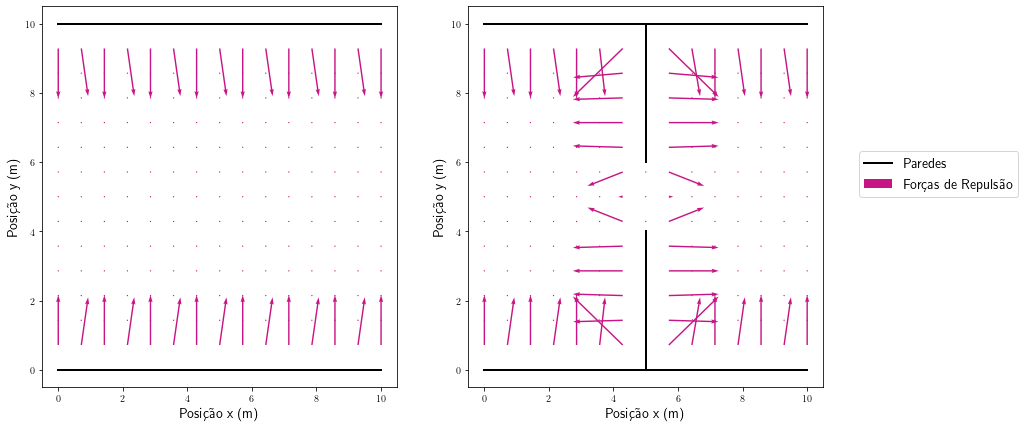

In [17]:
cs.U_ZERO = 1000

# Number of grid points
num = 15 

fig, (ax, lax) = plt.subplots(1, 2, figsize = [14,7])


###############################
# Map without wall:
###############################

# Make an agent walk through the environment and calculate the total repulsion force:
uid = 0
desired_direction = np.array([1, 0])
position = np.array([0,0])
adapt = False
from_zero = False
turns = False
agent = Agent(uid, position, desired_direction, from_zero, adapt, turns)

## Create borders for the simplest scenario, where there are just two walls:

cs.BORDERS = pd.read_csv("./borders_simple.csv")

borders = []

for index, row in cs.BORDERS.iterrows(): 
    uid = index
            
    if row["shape"] == "line":
            
        x1 = row["x1"]
        y1 = row["y1"]
        x2 = row["x2"]
        y2 = row["y2"]
                
        Qx = np.linspace(start=x1, stop=x2, num=50)
        Qy = np.linspace(start=y1, stop=y2, num=50)

    borders.append(Border(uid, Qx, Qy))

## Create a grid of points where the agent will pass:

dist_x = np.linspace(start=0, stop=10, num=num)
dist_y = np.linspace(start=0, stop=10, num=num)

Fx = np.zeros((len(dist_x), len(dist_y)))
Fy = np.zeros((len(dist_x), len(dist_y)))

## Move the agent around and get the resultant:

j = 0
for xx in dist_x:
    i = 0
    for yy in dist_y:
        
        agent.position = np.array([xx,yy])
        total = np.array([0, 0])
        for border in borders:

            border_dist_min = border.calc_dist(agent.position[0], agent.position[1], border.uid)  
            dist_norm = norm(border_dist_min)
            border_repulsion = agent.calc_border_repulsion(border_dist_min[0], border_dist_min[1])
            total = total + border_repulsion
        Fx[i, j] = total[0]
        Fy[i, j] = total[1]
        i = i + 1
    j = j + 1
    
## Create plot for the first scenario:
    
for border in borders:
    Q = np.array([border.Qx, border.Qy]).T
    ax.plot(Q[:,0], Q[:,1], linewidth = 2, linestyle = '-', color = "black")
    
ax.set_xlabel("Posição x (m)", fontsize = fontsize)
ax.set_ylabel("Posição y (m)", fontsize = fontsize)
Fx[0,:] = 0
Fx[num-1,:] = 0
Fy[0,:] = 0
Fy[num-1,:] = 0
ax.quiver(dist_x, dist_y, Fx, Fy, scale = 1000, color = color)

###############################
# Map with wall:
###############################

# Make an agent walk through the environment and calculate the total repulsion force:
uid = 0
desired_direction = np.array([1, 0])
position = np.array([0,0])
adapt = False
from_zero = False
turns = False
agent = Agent(uid, position, desired_direction, from_zero, adapt, turns)

## Create borders for the second scenario:

cs.BORDERS = pd.read_csv("./borders.csv")

borders = []

for index, row in cs.BORDERS.iterrows(): 
    uid = index
            
    if row["shape"] == "line":
            
        x1 = row["x1"]
        y1 = row["y1"]
        x2 = row["x2"]
        y2 = row["y2"]
                
        Qx = np.linspace(start=x1, stop=x2, num=50)
        Qy = np.linspace(start=y1, stop=y2, num=50)

    borders.append(Border(uid, Qx, Qy))

## Create a grid of points where the agent will pass:

dist_x = np.linspace(start=0, stop=10, num=num)
dist_y = np.linspace(start=0, stop=10, num=num)

Fx = np.zeros((len(dist_x), len(dist_y)))
Fy = np.zeros((len(dist_x), len(dist_y)))

## Move the agent around and get the resultant:
j = 0

for xx in dist_x:
    i = 0
    for yy in dist_y:
        
        agent.position = np.array([xx,yy])
        total = np.array([0, 0])
        for border in borders:

            border_dist_min = border.calc_dist(agent.position[0], agent.position[1], border.uid)  
            dist_norm = norm(border_dist_min)
            border_repulsion = agent.calc_border_repulsion(border_dist_min[0], border_dist_min[1])
            total = total + border_repulsion
        Fx[i, j] = total[0]
        Fy[i, j] = total[1]
        i = i + 1
    j = j + 1

## Create plot for the second scenario:

n = len(borders)
i = 0
for border in borders:
    Q = np.array([border.Qx, border.Qy]).T
    lax.plot(Q[:,0], Q[:,1], linewidth = 2, linestyle = '-', color = "black")
    if i == n - 1:
        lax.plot(Q[:,0], Q[:,1], linewidth = 2, linestyle = '-', color = "black", label = "Paredes")
    i = i + 1

lax.set_xlabel("Posição x (m)", fontsize = fontsize)
lax.set_ylabel("Posição y (m)", fontsize = fontsize)

Fx[0,:] = 0
Fx[num-1,:] = 0
Fy[0,:] = 0
Fy[num-1,:] = 0
Fx[:,int(num/2)] = 0
Fy[:,int(num/2)] = 0

lax.quiver(dist_x, dist_y, Fx, Fy, scale = 1000, color = color, label = "Forças de Repulsão")

####

lax.legend(fontsize = fontsize, loc = (1.1, 0.5))

plt.savefig(output_folder + "map_borders.png", bbox_inches = "tight", dpi = 600)

## Oscilação em torno da posição de destino

## Sensibilidade $U_{0}$

### Trajetórias

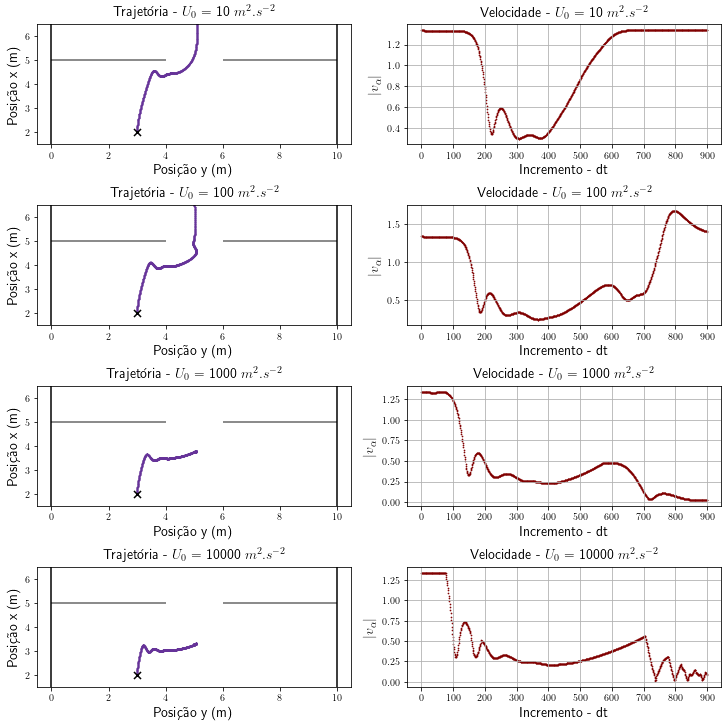

In [15]:
directory1 = "/home/maria/current/work/poli/masters_project/model/SocialForces/v2/log/passageway_test/one_agent/down/"

file_list1 = os.listdir(directory1)
file_list1.sort()

fig = plt.figure(constrained_layout=True, figsize = [10,10])
gs = fig.add_gridspec(4, 2)

traj1 = []
for i in range(0,4):
    traj1.append(fig.add_subplot(gs[i, 0]))

traj2 = []
for i in range(0,4):
    traj2.append(fig.add_subplot(gs[i, 1]))

    
cut = 900
params = [10, 100, 1000, 10000]

i = 0
for sim_code in file_list1:
    param = params[i]

    log_path = directory1 + sim_code + "/tracks.csv"
    
    df = pd.read_csv(log_path)
    
#     if i == 0 or i == 1:
#         traj1[i].scatter(df["position_y"][0:cut], df["position_x"][0:cut], s = 1, label = param)
#     else:
#         traj1[i].scatter(df["position_y"], df["position_x"], s = 1, label = param)

    traj1[i].scatter(df["position_y"][0:cut], df["position_x"][0:cut], color = "rebeccapurple", s = 0.5, label = param)
    traj1[i].hlines(xmin = 0, xmax = 4, y = 5, alpha = 0.6)
    traj1[i].hlines(xmin = 6, xmax = 10, y = 5, alpha = 0.6)
    traj1[i].vlines(ymin = 0, ymax = 10, x = 0, alpha = 1)
    traj1[i].vlines(ymin = 0, ymax = 10, x = 10, alpha = 1)
    traj1[i].scatter(3,2, marker = "x", s = 50, color = "black", label = "Destino")
    
    traj1[i].set_xlabel("Posição y (m)", fontsize = fontsize)
    traj1[i].set_ylabel("Posição x (m)", fontsize = fontsize)
    traj1[i].set_ylim(1.5,6.5)
    traj1[i].set_title("Trajetória - $U_{0}$ = " + str(param) + r" $m^{2}.s^{-2}$", fontsize = fontsize)
    
    traj2[i].scatter(df["step"][0:cut], df["velocity_mag"][0:cut], s = 0.5, color = 'maroon', label = param)
    traj2[i].set_title("Velocidade - $U_{0}$ = " + str(param) + r" $m^{2}.s^{-2}$", fontsize = fontsize)
    traj2[i].set_xlabel("Incremento - dt", fontsize = fontsize)
    traj2[i].set_ylabel(r"$|v_{\alpha}|$", fontsize = fontsize)
    traj2[i].xaxis.set_major_locator(plt.MultipleLocator(100))
    traj2[i].grid(b = True, which = "major")
    

    i = i + 1
    

plt.savefig(output_folder + "one_agent_trajetorias_down.png", dpi = 300, bbox_inches = "tight")
    

## Sensibilidade $V_{0}$

Para vários valores de $V_{0}$ (ver gráfico), simulamos o comportamento de dois agentes movendo-se em direções opostas, em trajetórias próximas uma da outra.

sim_S1300A2_V_ZERO2100cs2
sim_S1300A2_V_ZERO210cs2
sim_S1300A2_V_ZERO21cs2
sim_S1300A2_V_ZERO2cs2


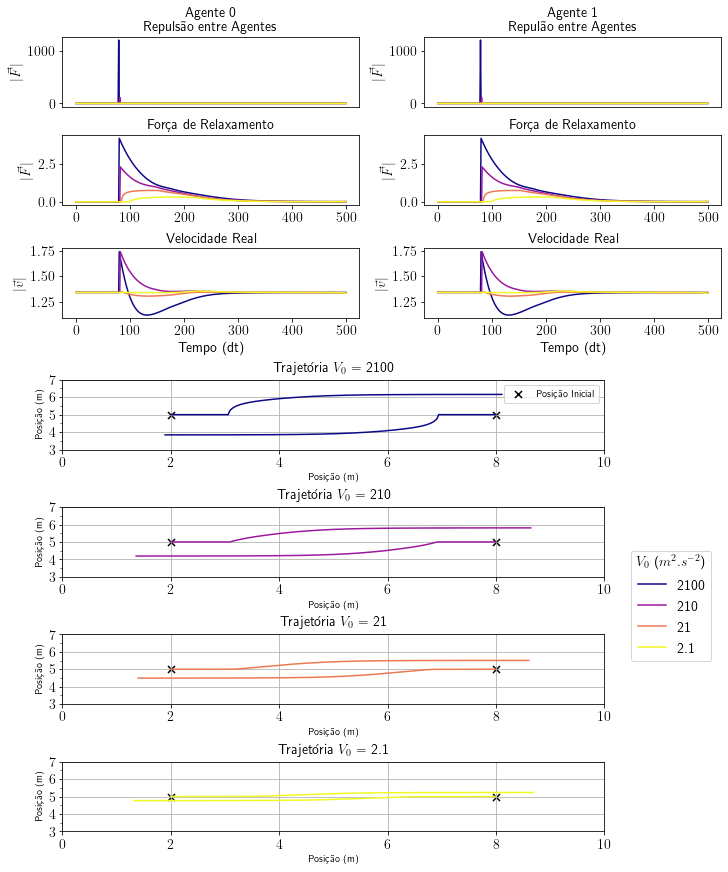

In [8]:
directory = "/home/maria/current/work/poli/masters_project/model/SocialForces/v2/log/two_agent_test/sensibility_Vzero/"
file_list = os.listdir(directory)
file_list.sort()

cmap = matplotlib.cm.get_cmap("plasma")

fig = plt.figure(constrained_layout=True, figsize = [10,12])
gs = fig.add_gridspec(7, 4)

ax11 = fig.add_subplot(gs[0, :2])
ax12 = fig.add_subplot(gs[0, 2:])
ax21 = fig.add_subplot(gs[1, :2])
ax22 = fig.add_subplot(gs[1, 2:])
ax31 = fig.add_subplot(gs[2, :2])
ax32 = fig.add_subplot(gs[2, 2:])

leg = fig.add_subplot(gs[3:,3:])

trajs = []
for i in range(3,7):
    trajs.append(fig.add_subplot(gs[i,:3]))

ax11.set_title("Agente 0\nRepulsão entre Agentes", fontsize = fontsize, pad = pad)
ax11.set_xlabel("", fontsize = fontsize)
ax11.set_xticks([])
ax11.set_ylabel(r"$|\vec{F}|$", fontsize = 14)
ax11.tick_params(labelsize = 14)

ax12.set_title("Agente 1\nRepulão entre Agentes", fontsize = fontsize, pad = pad)
ax12.set_xlabel("", fontsize = 14)
ax12.set_xticks([])
ax12.set_ylabel(r"$|\vec{F}|$", fontsize = 14)
ax12.tick_params(labelsize = 14)

ax21.set_title("Força de Relaxamento", fontsize = 14, pad = 6)
ax21.set_ylabel(r"$|\vec{F}|$", fontsize = 14)
ax21.tick_params(labelsize = 14)

ax22.set_title("Força de Relaxamento", fontsize = 14, pad = 6)
ax22.set_ylabel(r"$|\vec{F}|$", fontsize = 14)
ax22.tick_params(labelsize = 14)

ax31.set_title("Velocidade Real", fontsize = 14, pad = 6)
ax31.set_xlabel("Tempo (dt)", fontsize = 14)
ax31.set_ylabel(r"$|\vec{v}|$", fontsize = 14)
ax31.tick_params(labelsize = 14)

ax32.set_title("Velocidade Real", fontsize = 14, pad = 6)
ax32.set_xlabel("Tempo (dt)", fontsize = 14)
ax32.set_ylabel(r"$|\vec{v}|$", fontsize = 14)
ax32.tick_params(labelsize = 14)

#ax31.vlines(x = 10.1, ymin = 3, ymax = 11, linestyles = "--" )

param_list = [2100, 210, 21, 2.1]

i = 0
n = len(file_list)-1

cut = 500
for sim_code in file_list:
    print(sim_code)
    V_zero = param_list[i]
    
    log_path = directory + sim_code + "/tracks.csv"
    df = pd.read_csv(log_path)
    
    trajs[i].set_title("Trajetória " + r'$V_{0}$ = ' + str(V_zero), fontsize = fontsize, pad = pad)
    trajs[i].tick_params(labelsize = labelsize)
    trajs[i].set_xlim(0,10)
    trajs[i].set_ylim(3,7)
    trajs[i].set_ylabel("Posição (m)", fontsize = 10)
    trajs[i].set_xlabel("Posição (m)", fontsize = 10)
    trajs[i].yaxis.set_major_locator(plt.MultipleLocator(1))
    trajs[i].yaxis.set_minor_locator(plt.MultipleLocator(0.5))
    trajs[i].grid(b = True, which = "major")

    
    subset = df[df["agent_id"] == 0]
    ax11.plot(subset["step"][0:cut], subset["agent_repulsion_mag"][0:cut], color=cmap(i/n))
    ax21.plot(subset["step"][0:cut], subset["time_relaxation_mag"][0:cut], color=cmap(i/n))
    ax31.plot(subset["step"][0:cut], subset["velocity_mag"][0:cut], color=cmap(i/n), label=param_list[i])
    trajs[i].plot(subset["position_y"][0:cut], subset["position_x"][0:cut], color=cmap(i/n))
    
    subset = df[df["agent_id"] == 1]
    ax12.plot(subset["step"][0:cut], subset["agent_repulsion_mag"][0:cut], color=cmap(i/n))
    ax22.plot(subset["step"][0:cut], subset["time_relaxation_mag"][0:cut], color=cmap(i/n))
    ax32.plot(subset["step"][0:cut], subset["velocity_mag"][0:cut], color=cmap(i/n))
    trajs[i].plot(subset["position_y"][0:cut], subset["position_x"][0:cut], color=cmap(i/n))

    trajs[i].scatter(2, 5, marker = "x", s = 50, color = "black")
    trajs[i].scatter(8, 5, marker = "x", s = 50, color = "black", label = "Posição Inicial")
    
    i = i + 1


#####################
# Annotate plot 1
#####################

# trajs[0].annotate(r"",
#     xy=(3, 4.2),      
#     xytext=(2, 4.2), 
#     xycoords='data',
#     fontsize = fontsize,
#     arrowprops=dict(arrowstyle = "->"),            
#     horizontalalignment='center',
#     verticalalignment='center',
#     clip_on=True)  # clip to the axes bounding box

# trajs[0].annotate(r"$\vec{e_{\alpha}}$",
#     xy=(2.5, 4.4),      
#     xycoords='data',
#     fontsize = fontsize,
#     horizontalalignment='center',
#     verticalalignment='center',
#     clip_on=True)  # clip to the axes bounding box


# trajs[0].annotate(r"",
#     xy=(7, 5.8),      
#     xytext=(8, 5.8), 
#     xycoords='data',
#     fontsize = fontsize,
#     arrowprops=dict(arrowstyle = "->"),            
#     horizontalalignment='center',
#     verticalalignment='center',
#     clip_on=True)  # clip to the axes bounding box

# trajs[0].annotate(r"$\vec{e_{\beta}}$",
#     xy=(7.5, 5.6),      
#     xycoords='data',
#     fontsize = fontsize,
#     horizontalalignment='center',
#     verticalalignment='center',
#     clip_on=True)  


h,l = ax31.get_legend_handles_labels()
leg.legend(h,l, title = r"$V_{0}$ ($m^{2}.s^{-2}$)", title_fontsize = fontsize, fontsize = fontsize, loc = "center", borderaxespad=0)
leg.axis("off")

trajs[0].legend(fontsize = fontsize-4)

plt.savefig(output_folder + "teste_Vzero.png", dpi = 300, bbox_inches = "tight")

## Sensibilidade $\Delta t$

['1sim_S1300A2_TAU0.5_deltat0.5_cs2', '2sim_S1300A2_TAU0.5_deltat1_cs2', '3sim_S1300A2_TAU0.5_deltat1.5_cs2', '4sim_S1300A2_TAU0.5_deltat2_cs2']


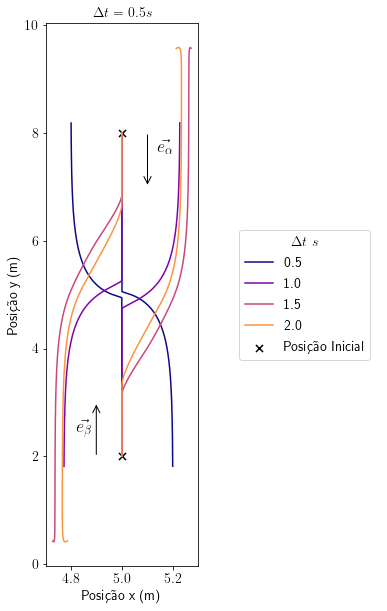

In [10]:
##### RUN THIS WITH SAME INITIAL VELOCITY

cmap = matplotlib.cm.get_cmap("plasma")
cut = 600
fig, (ax,lax) = plt.subplots(1,2, figsize = [6,10], sharey = True)

ax.set_title(r"$\Delta t = 0.5 s$", fontsize = fontsize)
ax.set_xlabel("Posição x (m)", fontsize = 14)
ax.set_ylabel(r"Posição y (m)", fontsize = 14)
ax.tick_params(labelsize = 14)

directory = "/home/maria/current/work/poli/masters_project/model/SocialForces/v2/log/two_agent_test/sensibility_deltat/"
file_list = os.listdir(directory)
file_list.sort()
print(file_list)
i = 0 
n = len(file_list)
for sim_code in file_list:
    
    deltat = (i+1)*0.5
    deltat = round(deltat,1)
    log_path = directory + sim_code + "/tracks.csv"
    df = pd.read_csv(log_path)
    
    subset = df[df["agent_id"] == 0]
    ax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], color=cmap(i/n))

    subset = df[df["agent_id"] == 1]
    ax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], label=deltat, color=cmap(i/n))
    i = i + 1
    
ax.annotate(r"",
            xy=(5.1, 7),      
            xytext=(5.1, 8), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.annotate(r"$\vec{e_{\alpha}}$",
            xy=(5.17, 7.7),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box


ax.annotate(r"",
            xy=(4.9, 3),      
            xytext=(4.9, 2), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.annotate(r"$\vec{e_{\beta}}$",
            xy=(4.85, 2.5),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.scatter(5, 2, marker = "x", s = 50, color = "black")
ax.scatter(5, 8, marker = "x", s = 50, color = "black", label = "Posição Inicial")

h,l = ax.get_legend_handles_labels()
lax.legend(h,l,title = r"$\Delta t$ $s$", title_fontsize = fontsize, fontsize = fontsize, loc = "center", borderaxespad=0)
lax.axis("off")

plt.savefig(output_folder + "teste_deltat.png", dpi = 300, bbox_inches = "tight")


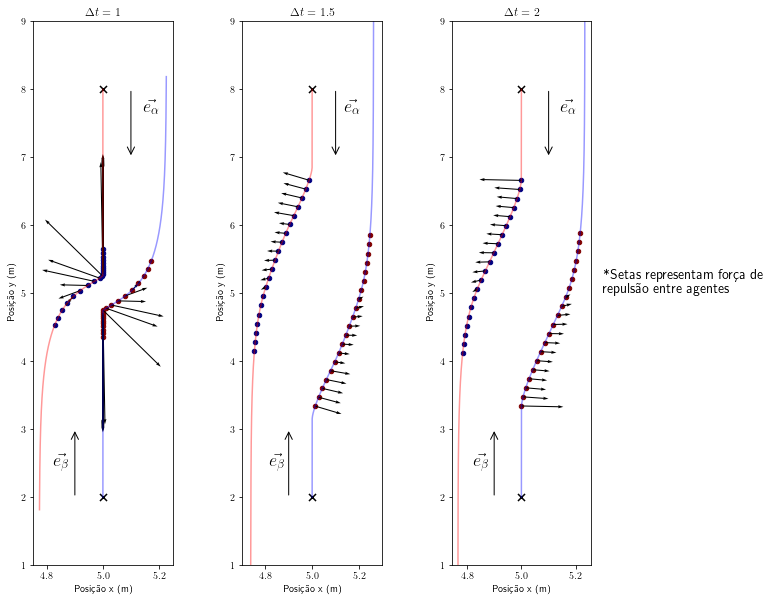

In [114]:
fig, (jax, ax, lax) = plt.subplots(1, 3, figsize = [10,10])

fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

df = pd.read_csv("./log/two_agent_test/sensibility_deltat/3sim_S1300A2_TAU0.5_deltat1.5_cs2/tracks.csv")
ax.set_title(r"$\Delta t = 1.5$")
ax.set_ylim(1,9)
ax.set_xlabel("Posição x (m)")
ax.set_ylabel("Posição y (m)")
cut = 600

        
subset = df[df["agent_id"] == 0]
ax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], alpha = 0.4, color="red")

subset = df[df["agent_id"] == 1]
ax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], alpha = 0.4, color="blue")


for step in range(100,300,10):
    
    time_step = df[df["step"] == step]
    
    subset = time_step[time_step["agent_id"] == 0]

    ax.scatter(subset.position_x, subset.position_y, color = "navy", s = 20)
    q = ax.quiver(subset.position_x, subset.position_y, 
                  subset.agent_repulsion_x, subset.agent_repulsion_y, scale = 3)
    
    subset = time_step[time_step["agent_id"] == 1]

    ax.scatter(subset.position_x, subset.position_y, color = "maroon", s=20)
    q = ax.quiver(subset.position_x, subset.position_y, 
                  subset.agent_repulsion_x, subset.agent_repulsion_y, scale = 3)

#ax.legend(handles = [q], labels = ["Repulsão entre agentes"],fontsize = fontsize)
        
ax.annotate(r"",
            xy=(5.1, 7),      
            xytext=(5.1, 8), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.annotate(r"$\vec{e_{\alpha}}$",
            xy=(5.17, 7.7),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box


ax.annotate(r"",
            xy=(4.9, 3),      
            xytext=(4.9, 2), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.annotate(r"$\vec{e_{\beta}}$",
            xy=(4.85, 2.5),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.scatter(5, 2, marker = "x", s = 50, color = "black")
ax.scatter(5, 8, marker = "x", s = 50, color = "black", label = "Posição Inicial")

################################################################

df = pd.read_csv("./log/two_agent_test/sensibility_deltat/2sim_S1300A2_TAU0.5_deltat1_cs2/tracks.csv")
jax.set_title(r"$\Delta t = 1$")
jax.set_ylim(1,9)
jax.set_xlabel("Posição x (m)")
jax.set_ylabel("Posição y (m)")
cut = 600

        
subset = df[df["agent_id"] == 0]
jax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], alpha = 0.4, color="red")

subset = df[df["agent_id"] == 1]
jax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], alpha = 0.4, color="blue")


for step in range(200,400,10):
    
    time_step = df[df["step"] == step]
    
    subset = time_step[time_step["agent_id"] == 0]

    jax.scatter(subset.position_x, subset.position_y, color = "navy", s = 20)
    q = jax.quiver(subset.position_x, subset.position_y, 
                  subset.agent_repulsion_x, subset.agent_repulsion_y, scale = 3)
    
    subset = time_step[time_step["agent_id"] == 1]

    jax.scatter(subset.position_x, subset.position_y, color = "maroon", s=20)
    q = jax.quiver(subset.position_x, subset.position_y, 
                  subset.agent_repulsion_x, subset.agent_repulsion_y, scale =3)

#ax.legend(handles = [q], labels = ["Repulsão entre agentes"],fontsize = fontsize)
        
jax.annotate(r"",
            xy=(5.1, 7),      
            xytext=(5.1, 8), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

jax.annotate(r"$\vec{e_{\alpha}}$",
            xy=(5.17, 7.7),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box


jax.annotate(r"",
            xy=(4.9, 3),      
            xytext=(4.9, 2), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

jax.annotate(r"$\vec{e_{\beta}}$",
            xy=(4.85, 2.5),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

jax.scatter(5, 2, marker = "x", s = 50, color = "black")
jax.scatter(5, 8, marker = "x", s = 50, color = "black", label = "Posição Inicial")


#############################################################

df = pd.read_csv("./log/two_agent_test/sensibility_deltat/4sim_S1300A2_TAU0.5_deltat2_cs2/tracks.csv")
lax.set_title(r"$\Delta t = 2$")
lax.set_ylim(1,9)
lax.set_xlabel("Posição x (m)")
lax.set_ylabel("Posição y (m)")
        
subset = df[df["agent_id"] == 0]
lax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], alpha = 0.4, color="red")

subset = df[df["agent_id"] == 1]
lax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], alpha = 0.4, color="blue")


for step in range(100,300,10):
    
    time_step = df[df["step"] == step]
    
    subset = time_step[time_step["agent_id"] == 0]

    lax.scatter(subset.position_x, subset.position_y, color = "navy", s = 20)
    q = lax.quiver(subset.position_x, subset.position_y, 
                  subset.agent_repulsion_x, subset.agent_repulsion_y, scale = 3)
    
    subset = time_step[time_step["agent_id"] == 1]

    lax.scatter(subset.position_x, subset.position_y, color = "maroon", s=20)
    lax.quiver(subset.position_x, subset.position_y, 
                  subset.agent_repulsion_x, subset.agent_repulsion_y, scale = 3)
    
    
#ax.legend(handles = [q], labels = ["Repulsão entre agentes"],fontsize = fontsize)
        
lax.annotate(r"",
            xy=(5.1, 7),      
            xytext=(5.1, 8), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

lax.annotate(r"$\vec{e_{\alpha}}$",
            xy=(5.17, 7.7),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box


lax.annotate(r"",
            xy=(4.9, 3),      
            xytext=(4.9, 2), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

lax.annotate(r"$\vec{e_{\beta}}$",
            xy=(4.85, 2.5),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

lax.scatter(5, 2, marker = "x", s = 50, color = "black")
lax.scatter(5, 8, marker = "x", s = 50, color = "black", label = "Posição Inicial")

lax.text(5.3, 5, "*Setas representam força de\nrepulsão entre agentes", fontsize = fontsize)

plt.savefig(output_folder + "teste_deltat.png", dpi = 300, bbox_inches = "tight")


\begin{equation}
\begin{split}
	\vec{f_{\alpha\beta}} (\vec{r_{\alpha\beta}}) & := {} -\nabla_{\vec{r_{\alpha\beta}}} V_{\alpha\beta} [b(\vec{r_{\alpha\beta}})] = \\ & = V_{\alpha\beta}^{0} \frac{ \| \vec{r_{\alpha\beta}} \| + \| \vec{r_{\alpha\beta}} - (\vec{v_{\beta}} - \vec{v_{\alpha}}) \Delta t \| }{ 4b_{\alpha\beta} } \left( \frac{ \vec{r_{\alpha\beta}} }{ \| \vec{r_{\alpha\beta}} \| } + \frac{ \vec{r_{\alpha\beta}} - (\vec{v_{\beta}} - \vec{v_{\alpha}} )\Delta t }{ \|\vec{r_{\alpha\beta}}\ - (\vec{v_{\beta}} - \vec{v_{\alpha}}) \Delta t\| }  \right) e^{\frac{-b}{\sigma}}
\end{split}
\end{equation}


In [ ]:
fig, ax = plt.subplots(figsize = [2,6])
ax.set_ylim(1,9)
ax.set_xlabel("Posição x (m)")
ax.set_ylabel("Posição y (m)")
cut = 600

        
subset = df[df["agent_id"] == 0]
ax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], alpha = 0.4, color="red")

subset = df[df["agent_id"] == 1]
ax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], alpha = 0.4, color="blue")


for step in range(100,300,10):
    
    time_step = df[df["step"] == step]
    
    subset = time_step[time_step["agent_id"] == 0]

    ax.scatter(subset.position_x, subset.position_y, color = "navy", s = 20)
    q = ax.quiver(subset.position_x, subset.position_y, 
                  subset.agent_repulsion_x, subset.agent_repulsion_y, scale = 3)
    
    subset = time_step[time_step["agent_id"] == 1]

    ax.scatter(subset.position_x, subset.position_y, color = "maroon", s=20)
    q = ax.quiver(subset.position_x, subset.position_y, 
                  subset.agent_repulsion_x, subset.agent_repulsion_y, scale = 3)

#ax.legend(handles = [q], labels = ["Repulsão entre agentes"],fontsize = fontsize)
        
ax.annotate(r"",
            xy=(5.1, 7),      
            xytext=(5.1, 8), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.annotate(r"$\vec{e_{\alpha}}$",
            xy=(5.17, 7.7),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box


ax.annotate(r"",
            xy=(4.9, 3),      
            xytext=(4.9, 2), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.annotate(r"$\vec{e_{\beta}}$",
            xy=(4.85, 2.5),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.scatter(5, 2, marker = "x", s = 50, color = "black")
ax.scatter(5, 8, marker = "x", s = 50, color = "black", label = "Posição Inicial")



In [47]:
df

agent_id  step  position_x  position_y    velocity_x  velocity_y  \
0            1     0    5.000000    2.000000  0.000000e+00    1.340000   
1            0     0    5.000000    8.000000  0.000000e+00   -1.340000   
2            0     1    5.000000    7.986600  5.712248e-07   -1.340023   
3            1     1    5.000000    2.013400  5.712248e-07    1.340023   
4            1     2    5.000000    2.026801  2.913620e-08    1.340043   
...        ...   ...         ...         ...           ...         ...   
2586         0  1293    4.797998    0.582167  3.116171e-04   -0.000133   
2587         1  1293    5.202033    9.417837  4.398525e-03    0.000130   
2588         0  1294    4.797978    0.582166 -2.020385e-03   -0.000112   
2589         1  1294    5.202053    9.417838  1.984493e-03    0.000109   
2590         1  1295    5.202049    9.417839 -3.803883e-04    0.000087   

      resultant_x  resultant_y  time_relaxation_x  time_relaxation_y  \
0        0.000057     0.002262       0.000000e+00           0.000000   
1        0.000057    -0.002262       0.000000e+00           0.000000   
2       -0.000054    -0.002070      -1.142450e-06           0.000045   
3       -0.000054     0.002070      -1.142450e-06          -0.000045   
4       -0.000049     0.001892      -5.827239e-08          -0.000087   
...           ...          ...                ...                ...   
2586    -0.233200     0.002143      -6.232341e-04          -2.679733   
2587    -0.241403    -0.002177      -8.797050e-03           2.679739   
2588     0.236695     0.002089       4.040769e-03          -2.679776   
2589    -0.236488    -0.002179      -3.968986e-03           2.679783   
2590    -0.231777    -0.002141       7.607766e-04           2.679826   

      agent_repulsion_x  agent_repulsion_y  border_repulsion_x  \
0                   0.0                0.0            0.000057   
1                   0.0                0.0            0.000057   
2                   0.0                0.0           -0.000053   
3                   0.0                0.0           -0.000053   
4                   0.0                0.0           -0.000049   
...                 ...                ...                 ...   
2586                0.0                0.0           -0.232577   
2587                0.0                0.0           -0.232606   
2588                0.0                0.0            0.232654   
2589                0.0                0.0           -0.232519   
2590                0.0                0.0           -0.232537   

      border_repulsion_y  resultant_mag  velocity_mag  agent_repulsion_mag  \
0               0.002262       0.002263      1.340000                  0.0   
1              -0.002262       0.002263      1.340000                  0.0   
2              -0.002116       0.002071      1.340023                  0.0   
3               0.002116       0.002071      1.340023                  0.0   
4               0.001978       0.001892      1.340043                  0.0   
...                  ...            ...           ...                  ...   
2586            2.681876       0.233210      0.000339                  0.0   
2587           -2.681917       0.241413      0.004400                  0.0   
2588            2.681865       0.236704      0.002023                  0.0   
2589           -2.681962       0.236498      0.001987                  0.0   
2590           -2.681968       0.231787      0.000390                  0.0   

      time_relaxation_mag  border_repulsion_mag  
0                0.000000              0.002263  
1                0.000000              0.002263  
2                0.000045              0.002116  
3                0.000045              0.002116  
4                0.000087              0.001979  
...                   ...                   ...  
2586             2.679733              2.691942  
2587             2.679754              2.691985  
2588             2.679779              2.691938  
2589             2.679

## Sensibilidade $\tau$

O valor de $\tau$ só faz diferença caso os pedestres sejam forçados a sair da sua trajetória desejada. Utilizamos a mesma simulação da análise anterior, com $V_{0}$ igual a 100 e a 10000, para observar variações nos valores de $\tau$.

Esta análise é bastante influenciada pelo falor de $Delta t$. Neste caso, utilizamos $Delta t = 1 seg$.

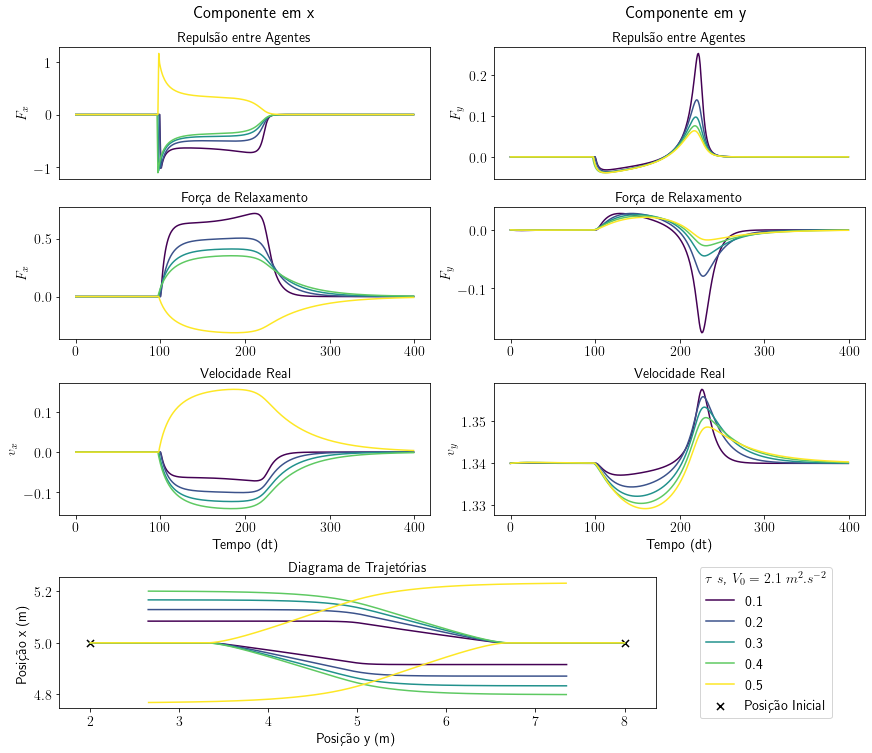

In [18]:
directory = "/home/maria/current/work/poli/masters_project/model/SocialForces/v2/log/two_agent_test/sensibility_tau/"
file_list = os.listdir(directory)
file_list.sort()

fig = plt.figure(constrained_layout=True, figsize = [12,10])
gs = fig.add_gridspec(4, 4)

ax11 = fig.add_subplot(gs[0, :2])
ax12 = fig.add_subplot(gs[0, 2:])
ax21 = fig.add_subplot(gs[1, :2])
ax22 = fig.add_subplot(gs[1, 2:])
ax31 = fig.add_subplot(gs[2, :2])
ax32 = fig.add_subplot(gs[2, 2:])
ax4 = fig.add_subplot(gs[3, 0:3])
leg = fig.add_subplot(gs[3,3]) 

ax4.set_title(r"Diagrama de Trajetórias", fontsize = fontsize)
ax4.set_xlabel("Posição y (m)", fontsize = fontsize)
ax4.set_ylabel(r"Posição x (m)", fontsize = fontsize)
ax4.tick_params(labelsize = fontsize)

ax11.set_title("Repulsão entre Agentes", fontsize = fontsize, pad = pad)
ax11.set_xlabel("", fontsize = fontsize)
ax11.set_xticks([])
ax11.set_ylabel(r"$F_{x}$", fontsize = fontsize)
ax11.tick_params(labelsize = fontsize)

ax12.set_title("Repulsão entre Agentes", fontsize = fontsize, pad = 6)
ax12.set_xlabel("", fontsize = fontsize)
ax12.set_xticks([])
ax12.set_ylabel(r"$F_{y}$", fontsize = fontsize)
ax12.tick_params(labelsize = fontsize)

ax21.set_title("Força de Relaxamento", fontsize = fontsize, pad = 6)
ax21.set_ylabel(r"$F_{x}$", fontsize = fontsize)
ax21.tick_params(labelsize = fontsize)

ax22.set_title("Força de Relaxamento", fontsize = fontsize, pad = 6)
ax22.set_ylabel(r"$F_{y}$", fontsize = fontsize)
ax22.tick_params(labelsize = fontsize)

ax31.set_title("Velocidade Real", fontsize = fontsize, pad = 6)
ax31.set_xlabel("Tempo (dt)", fontsize = fontsize)
ax31.set_ylabel(r"$v_{x}$", fontsize = fontsize)
ax31.tick_params(labelsize = fontsize)

ax32.set_title("Velocidade Real", fontsize = fontsize, pad = 6)
ax32.set_xlabel("Tempo (dt)", fontsize = fontsize)
ax32.set_ylabel(r"$v_{y}$", fontsize = fontsize)
ax32.tick_params(labelsize = fontsize)

i = 0
n = len(file_list)-1

cut = 400
for sim_code in file_list:
    
    
    tau = (i+1)*0.1
    tau = round(tau,1)
    
    log_path = directory + sim_code + "/tracks.csv"
    df = pd.read_csv(log_path)
    
    subset = df[df["agent_id"] == 1]
    ax11.plot(subset["step"][0:cut], subset["agent_repulsion_x"][0:cut], color=cmap(i/n))
    ax21.plot(subset["step"][0:cut], subset["time_relaxation_x"][0:cut], color=cmap(i/n))
    ax31.plot(subset["step"][0:cut], subset["velocity_x"][0:cut], color=cmap(i/n))
    
    ax12.plot(subset["step"][0:cut], subset["agent_repulsion_y"][0:cut], color=cmap(i/n))
    ax22.plot(subset["step"][0:cut], subset["time_relaxation_y"][0:cut], color=cmap(i/n))
    ax32.plot(subset["step"][0:cut], subset["velocity_y"][0:cut], color=cmap(i/n))
    
    ax4.plot(subset["position_y"][0:cut], subset["position_x"][0:cut], color=cmap(i/n), label = tau)

    subset = df[df["agent_id"] == 0]
    ax4.plot(subset["position_y"][0:cut], subset["position_x"][0:cut], color=cmap(i/n))

    
    i = i + 1
    
fig.text(0.29, 1.015, 'Componente em x', fontsize = fontsize + 3, ha='center')
fig.text(0.79, 1.015, 'Componente em y', fontsize = fontsize + 3, ha='center')

ax4.scatter(2, 5, marker = "x", s = 50, color = "black")
ax4.scatter(8, 5, marker = "x", s = 50, color = "black", label = "Posição Inicial")

h,l = ax4.get_legend_handles_labels()
leg.legend(h,l,title = r"$\tau$ $s$, $V_{0} = 2.1$ $m^{2}.s^{-2}$", title_fontsize = fontsize, fontsize = fontsize, loc = "center", borderaxespad=0)
leg.axis("off")

ax4.annotate(r"",
            xy=(7, 4.5),      
            xytext=(8, 4.5), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box

ax4.annotate(r"$\vec{e_{\alpha}}$",
            xy=(7.5, 4.6),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box


ax4.annotate(r"",
            xy=(3, 5.5),      
            xytext=(2, 5.5), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box

ax4.annotate(r"$\vec{e_{\beta}}$",
            xy=(2, 5.6),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box


plt.savefig(output_folder + "teste_tau_comps.png", dpi = 300, bbox_inches = "tight")

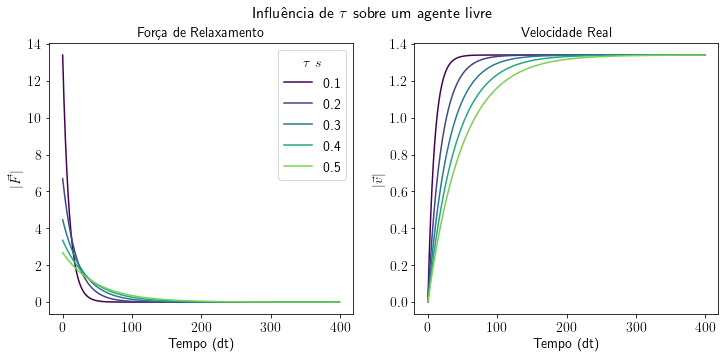

In [11]:
fig, (ax, lax) = plt.subplots(1, 2, figsize = [12,5])

fig.suptitle(r"Influência de $\tau$ sobre um agente livre", fontsize = 16)

ax.set_title(r"Força de Relaxamento", fontsize = 14)
ax.set_xlabel("Tempo (dt)", fontsize = 14)
ax.set_ylabel(r"$|\vec{F}|$", fontsize = 14)
ax.tick_params(labelsize = 14)

lax.set_title(r"Velocidade Real", fontsize = 14)
lax.set_xlabel("Tempo (dt)", fontsize = 14)
lax.set_ylabel(r"$|\vec{v}|$", fontsize = 14)
lax.tick_params(labelsize = 14)


directory = "/home/maria/current/work/poli/masters_project/model/SocialForces/v2/log/free_agent_tau/linear/"

file_list = os.listdir(directory)
file_list.sort()

i = 0 
n = len(file_list)
for sim_code in file_list:
    
    tau = (i+1)*0.1
    tau = round(tau,1)
    log_path = directory + sim_code + "/tracks.csv"
    df = pd.read_csv(log_path)
    
    subset = df[df["agent_id"] == 0]
    ax.plot(subset["step"], subset["time_relaxation_mag"], color=cmap(i/n), label = tau)
    lax.plot(subset["step"], subset["velocity_mag"], color=cmap(i/n))

    i = i + 1
    
    
ax.legend(title = r"$\tau$ $s$", fontsize = 14, title_fontsize = fontsize)


plt.savefig(output_folder + "free_tau.png", dpi = 300, bbox_inches = "tight")


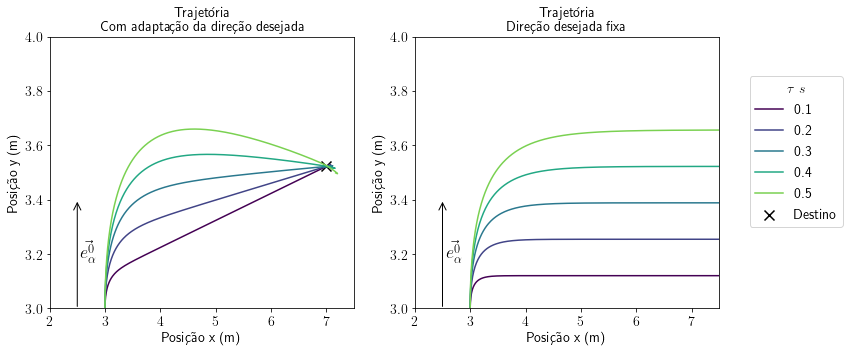

In [13]:
fig, (ax, lax) = plt.subplots(1, 2, figsize = [12,5])

#fig.suptitle(r"Influência de $\tau$ sobre um agente livre - Desvio angular", fontsize = 16)

ax.set_title("Trajetória\nCom adaptação da direção desejada", fontsize = 14)
ax.set_xlabel(r"Posição x (m)", fontsize = 14)
ax.set_ylabel(r"Posição y (m)", fontsize = 14)
ax.tick_params(labelsize = 14)
ax.set_ylim(3,4)
ax.set_xlim(2,7.5)

lax.set_title("Trajetória\nDireção desejada fixa", fontsize = 14)
lax.set_xlabel(r"Posição x (m)", fontsize = 14)
lax.set_ylabel(r"Posição y (m)", fontsize = 14)
lax.tick_params(labelsize = 14)
lax.set_xlim(2,7.5)
lax.set_ylim(3,4)
directory = "/home/maria/current/work/poli/masters_project/model/SocialForces/v2/log/free_agent_tau/angular/adapt/"

file_list = os.listdir(directory)
file_list.sort()

cut = 400
i = 0 
n = len(file_list)
for sim_code in file_list:
    
    tau = (i+1)*0.1
    tau = round(tau,1)
    log_path = directory + sim_code + "/tracks.csv"
    df = pd.read_csv(log_path)
    
    subset = df[df["agent_id"] == 0]
    ax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], color=cmap(i/n), label = tau)
    i = i + 1

ax.scatter(7, 3.5225, marker = "x", s = 100, color = "black", label = "Destino")
ax.legend(title = r"$\tau$ $s$", title_fontsize = fontsize, fontsize = fontsize, loc = (2.3, 0.3))

directory = "/home/maria/current/work/poli/masters_project/model/SocialForces/v2/log/free_agent_tau/angular/noadapt/"

file_list = os.listdir(directory)
file_list.sort()

i = 0 
n = len(file_list)
for sim_code in file_list:
    
    tau = (i+1)*0.1
    tau = round(tau,1)
    log_path = directory + sim_code + "/tracks.csv"
    df = pd.read_csv(log_path)
    
    subset = df[df["agent_id"] == 0]
    lax.plot(subset["position_x"][0:cut], subset["position_y"][0:cut], color=cmap(i/n), label = tau)
    i = i + 1


ax.annotate(r"",
            xy=(2.5, 3.4),      
            xytext=(2.5, 3),
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.annotate(r"$\vec{e_{\alpha}^{0}}$",
            xy=(2.7, 3.2),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box



lax.annotate(r"",
            xy=(2.5, 3.4),      
            xytext=(2.5, 3),
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

lax.annotate(r"$\vec{e_{\alpha}^{0}}$",
            xy=(2.7, 3.2),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

# fig.set_tight_layout(True)
plt.savefig(output_folder + "free_tau_ang.png", bbox_inches = "tight", dpi = 300,)


## Repulsão entre Agentes como Sugerido em 1995 - ESSA IMAGEM FOI REMOVIDA DA ANÁLISE

In [34]:

Fx_without_angle = np.zeros((len(dist_x), 1))
Fx_without_angle.shape

(10, 1)

Text(-1.2, 0.3, 'Agente $\\displaystyle \\alpha$ (móvel)')

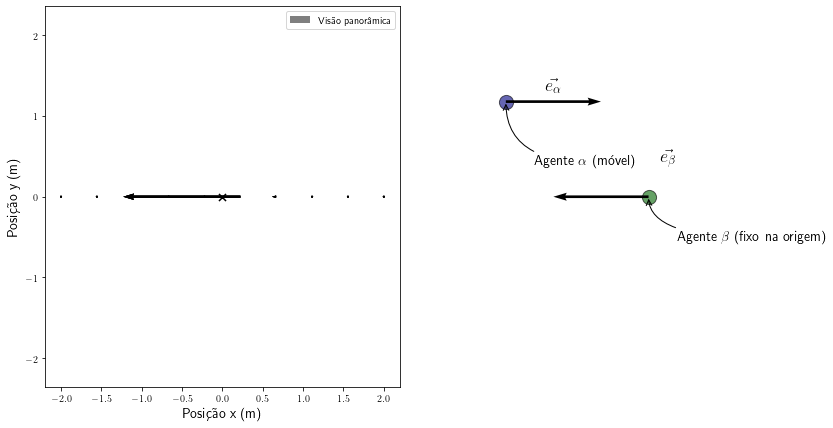

In [38]:
# Make an agent walk through the environment and calculate the total repulsion force:

# Define moving agent:
uid = 0
desired_direction = np.array([1, 0])
position = np.array([-2,-2])
adapt = False
from_zero = False
turns = False
agent0 = Agent(uid, position, desired_direction, from_zero, adapt, turns)

# Define fixed agent:
uid = 1
desired_direction = np.array([-1,0])
position = np.array([0,0])
adapt = False
from_zero = False
agent1 = Agent(uid, position, desired_direction, from_zero, adapt, turns)

def angle_of_view(e, f):

    norm_f = norm(f)
    w = np.dot(e, f)

    if w > norm_f*np.cos(cs.PHI):
        return cs.C
    else:
        return 1


cs.U_ZERO = 2.1
cs.Rt = 2
num = 10

# # Create walking grid:
# dist_x = np.linspace(start=-2, stop=2, num=num)
# dist_y = np.linspace(start=-2, stop=2, num=num)

# # Create forces for each grid point, with and without angle:
# Fx_with_angle = np.zeros((len(dist_x), len(dist_y)))
# Fy_with_angle = np.zeros((len(dist_x), len(dist_y)))

# Fx_without_angle = np.zeros((len(dist_x), len(dist_y)))
# Fy_without_angle = np.zeros((len(dist_x), len(dist_y)))


# Create walking grid:
dist_x = np.linspace(start=-2, stop=2, num=num)
dist_y = np.array([0]*len(dist_x))

# Create forces for each grid point, with and without angle:
Fx_with_angle = np.zeros((len(dist_x), len(dist_y)))
Fy_with_angle = np.zeros((len(dist_x), len(dist_y)))

Fx_without_angle = np.zeros((len(dist_x), len(dist_y)))
Fy_without_angle = np.zeros((len(dist_x), len(dist_y)))

# Fill arrays with values:
j = 0
for xx in dist_x:
    i = 0
    for yy in dist_y:
        
        agent0.position = np.array([xx,yy])
                
        dist = agent1.position - agent0.position
        
        # agent0's velocity we assume is zero, it is standing still:
        agent_repulsion = agent0.calc_agent_repulsion(dist[0], dist[1], -agent1.velocity, agent1.velocity)        

        Fx_without_angle[i, j] = agent_repulsion[0]
        Fy_without_angle[i, j] = agent_repulsion[1]
        
        angle_factor = angle_of_view(agent0.desired_direction, agent_repulsion)
        agent_repulsion = agent_repulsion*angle_factor

        Fx_with_angle[i, j] = agent_repulsion[0]
        Fy_with_angle[i, j] = agent_repulsion[1]
        
        i = i + 1
    j = j + 1

    
## Create plot:
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [14,7])

ax1.set_xlabel("Posição x (m)", fontsize = fontsize)
ax1.set_ylabel("Posição y (m)", fontsize = fontsize)
#Fx[0,:] = 0
#Fx[num-1,:] = 0
#Fy[0,:] = 0
#Fy[num-1,:] = 0

ax1.quiver(dist_x, dist_y, Fx_without_angle, Fy_without_angle, scale_units = 'xy', scale = 1, 
           color = "black", alpha = 0.5, label = "Visão panorâmica")
#ax1.quiver(dist_x, dist_y, Fx_with_angle, Fy_with_angle, scale_units = 'xy', scale = 10, color = color, label = "Visão restrita")

ax1.scatter(agent1.position[0],agent1.position[1], marker = "x", s = 50, color = "black")
ax1.axis("equal")
ax1.legend()

# Axis 2 is just a diagram:
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.axis("equal")
ax2.set_xlim(-2,2)
ax2.set_ylim(-2,2)
ax2.scatter(agent1.position[0],agent1.position[1], s = 200, alpha = 0.6, edgecolor = "black", facecolor = "darkgreen")
ax2.scatter(-1.5, 1, s = 200, alpha = 0.6, edgecolor = "black", facecolor = "navy")

ax2.quiver(-1.5, 1, agent0.desired_direction[0], agent0.desired_direction[1], scale_units = 'xy', scale = 1)
ax2.quiver(0, 0, agent1.desired_direction[0], agent1.desired_direction[1], scale_units = 'xy', scale = 1)

ax2.annotate(r"$\vec{e_{\alpha}}$",
            xy=(-1, 1.15),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax2.annotate(r"$\vec{e_{\beta}}$",
            xy=(0.2, 0.4),      
            xycoords='data',
            fontsize = 18,
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box


ax2.annotate(r'Agente $\displaystyle \beta$ (fixo na origem)',
            xy=(0, 0),      
            xytext=(0.3, -0.5), 
            xycoords='data',
            fontsize = 14,
            arrowprops=dict(arrowstyle = "->", connectionstyle = "angle3,angleA=0,angleB=-90"),            
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box


ax2.annotate(r'Agente $\displaystyle \alpha$ (móvel)',
            xy=(-1.5, 1),      
            xytext=(-1.2, 0.3), 
            xycoords='data',
            fontsize = 14,
            arrowprops=dict(arrowstyle = "->", connectionstyle = "angle3,angleA=0,angleB=-90"),            
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box



#plt.savefig(output_folder + "agent_map.png", dpi = 600)
#plt.savefig(output_folder + "agent_map_lowres.png", dpi = 300)


In [21]:
agent1.velocity

array([0.        , 1.14189494])

## Uma Elipse Didática

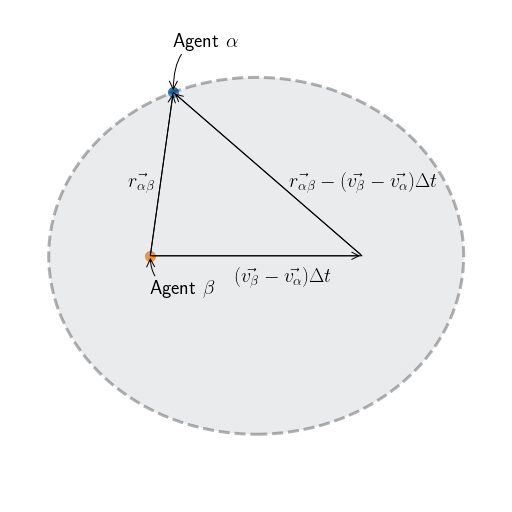

In [14]:

a = 5
b = 4.3
c = np.sqrt(a**2 - b**2)


def elipse(x, a, b):
    return np.sqrt(((b**2)*(a**2) - (b**2)*x**2)/(a**2))

ells = Ellipse(xy=(0,0), width=2*a, height=2*b, facecolor = "#BBBFC6", alpha = 0.3, edgecolor = "black", linewidth = 3, linestyle = "--")

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize = [7,7], constrained_layout=True)
ax.add_artist(ells)
# #ells.set_clip_box(ax.bbox)
# ells.set_alpha(0.6)
# ells.set_facecolor(np.random.rand(3))
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


x = -2
y = elipse(x, a, b)

ax.annotate(r'$\vec{r_{\alpha \beta}}$',fontsize = 20,
            xy=(-3.1, 1.6), xycoords='data')

ax.annotate(r'$\vec{r_{\alpha \beta}} - (\vec{v_{\beta}} - \vec{v_{\alpha}}) \Delta t$',fontsize = 20,
            xy=(0.8, 1.6), xycoords='data')

ax.annotate(r'$(\vec{v_{\beta}} - \vec{v_{\alpha}})\Delta t$',fontsize = 20,
            xy=(-0.5, -0.7), xycoords='data')

ax.annotate(r'Agent $\displaystyle \beta$',
            xy=(-c, 0),      
            xytext=(-c, -1), 
            xycoords='data',
            fontsize = 20,
            arrowprops=dict(arrowstyle = "->", connectionstyle = "angle3,angleA=0,angleB=-90"),            
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box


ax.annotate(r'Agent $\displaystyle \alpha$',
            xy=(x, y),      
            xytext=(x, y + 1), 
            xycoords='data',
            fontsize = 20,
            arrowprops=dict(arrowstyle = "->", connectionstyle = "angle3,angleA=0,angleB=-90"),            
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box



ax.scatter(x,y, s = 100)
ax.scatter(-c, 0, s = 100)
triangle_vertices = [[-c,0], [c,0],[x,y]]

ax.annotate(r"",
            xy=(c, 0),      
            xytext=(-c, 0), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.annotate(r"",
            xy=(x, y),      
            xytext=(-c, 0), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box

ax.annotate(r"",
            xy=(x, y),      
            xytext=(c, 0), 
            xycoords='data',
            fontsize = 18,
            arrowprops=dict(arrowstyle = "->"),            
            horizontalalignment='center',
            verticalalignment='center',
            clip_on=True)  # clip to the axes bounding box



triangle = plt.Polygon(triangle_vertices, facecolor = 'none', edgecolor = "black")
ax.add_artist(triangle)
plt.savefig(output_folder + "elipse.png", dpi = 300, bbox_inches = "tight")
plt.show()

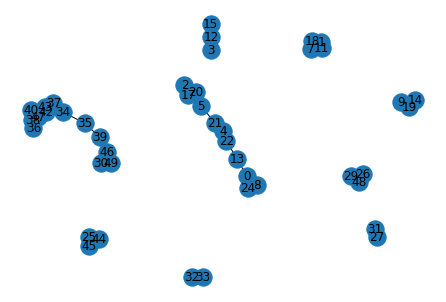

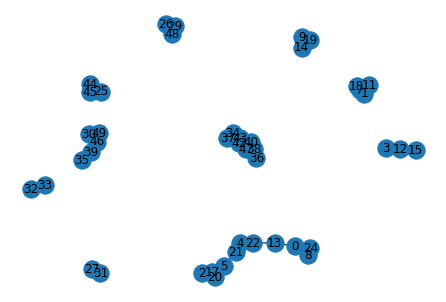

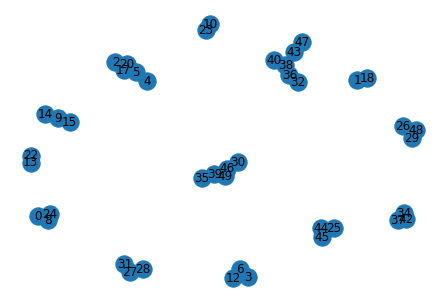

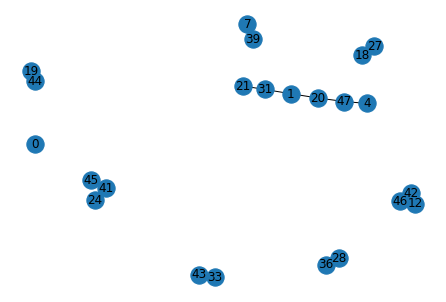

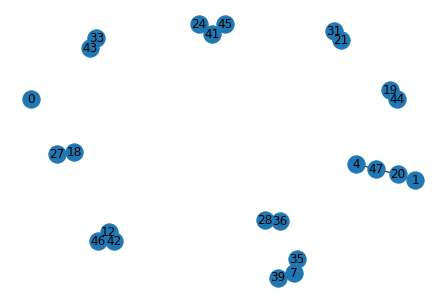

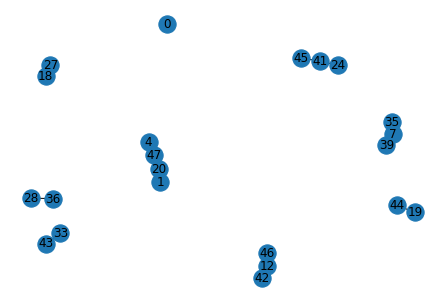

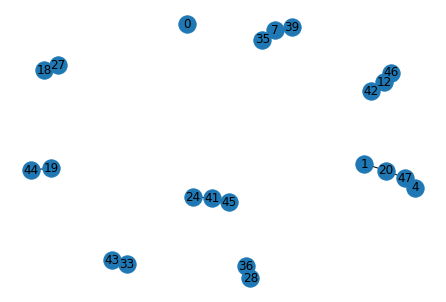

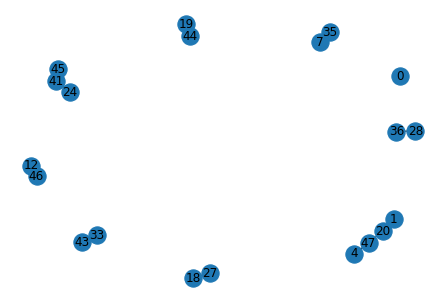

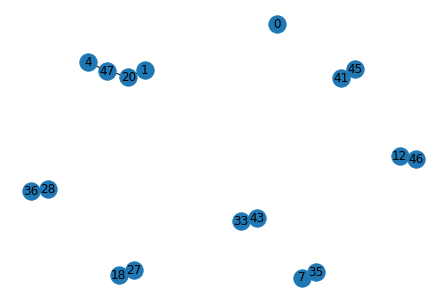

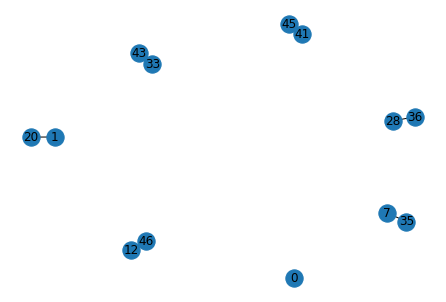

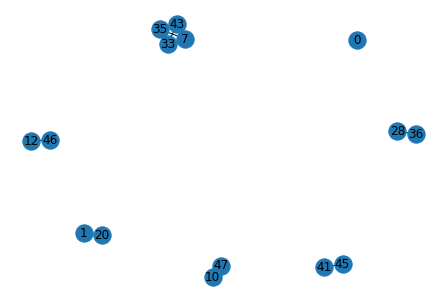

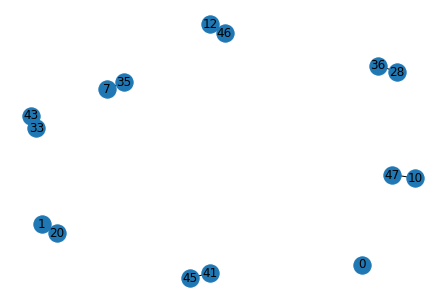

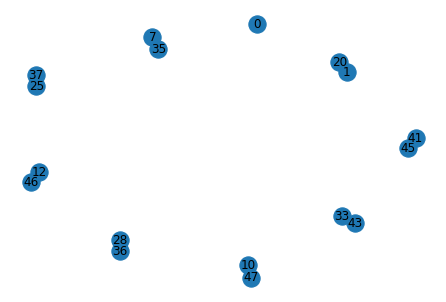

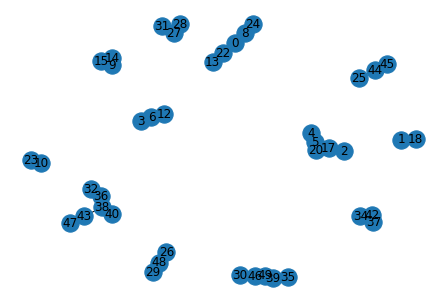

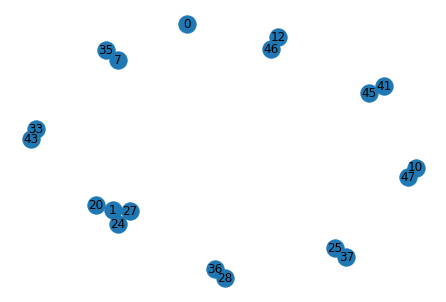

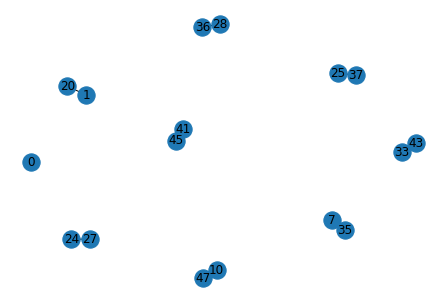

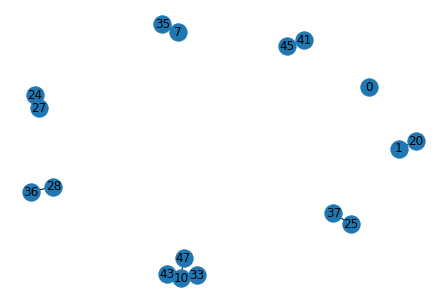

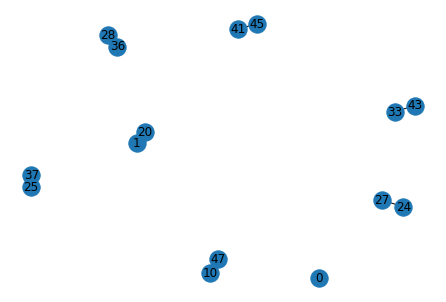

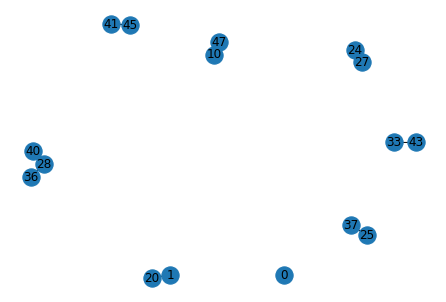

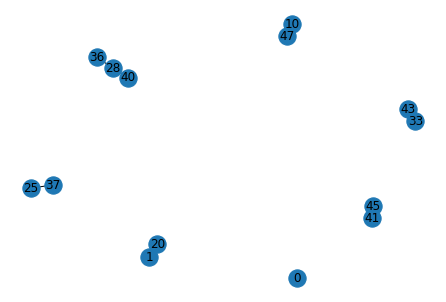

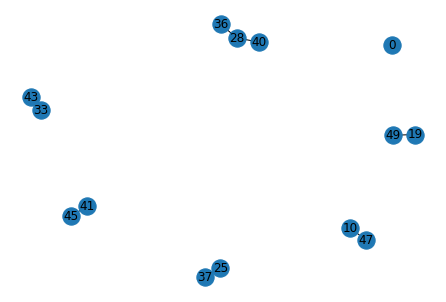

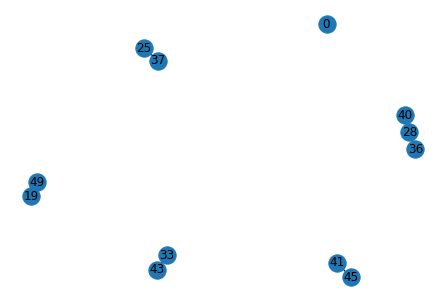

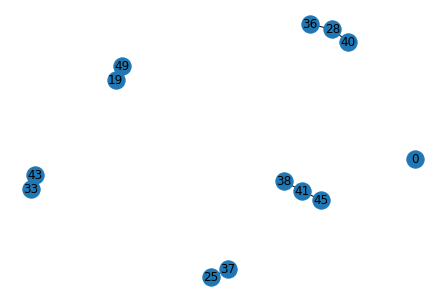

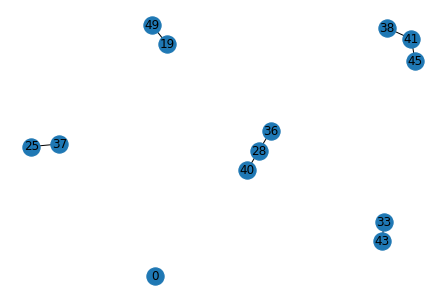

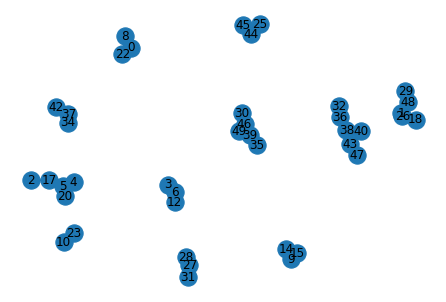

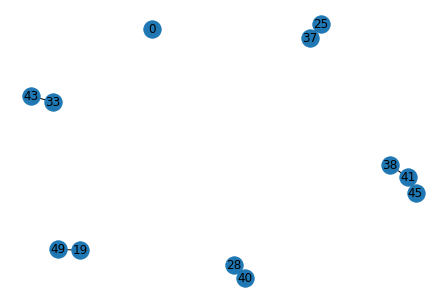

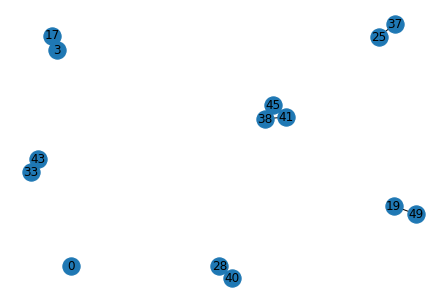

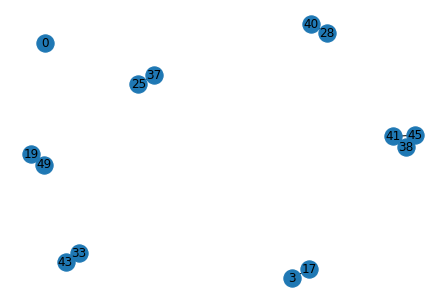

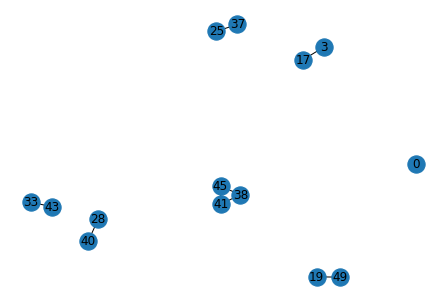

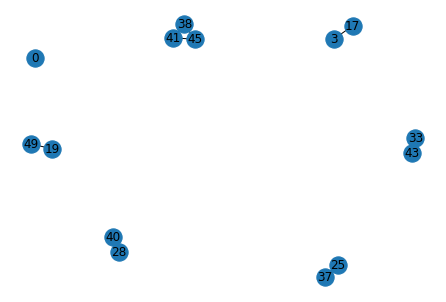

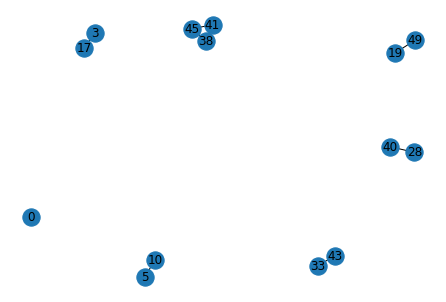

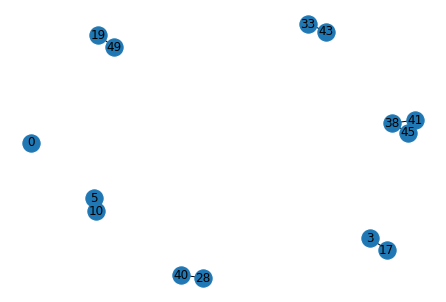

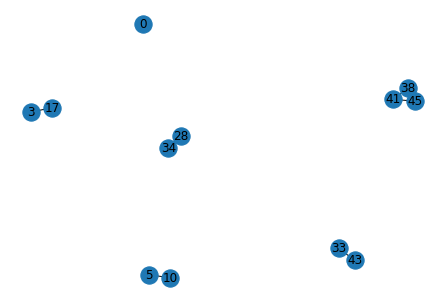

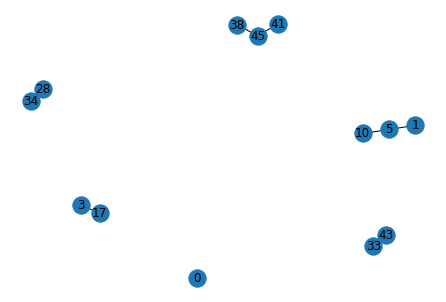

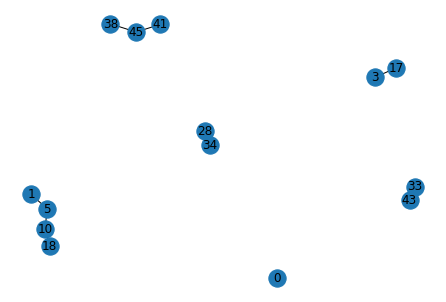

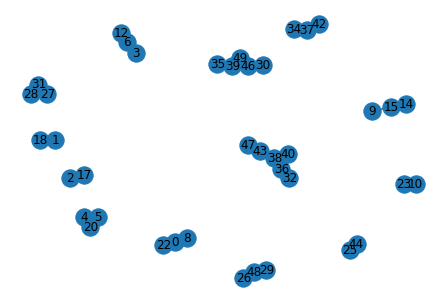

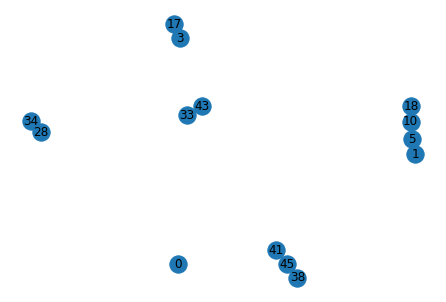

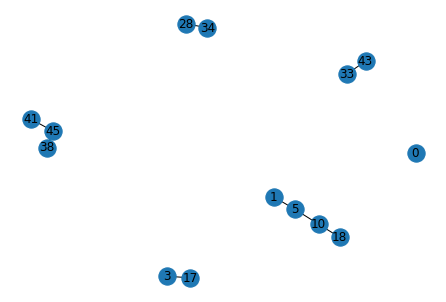

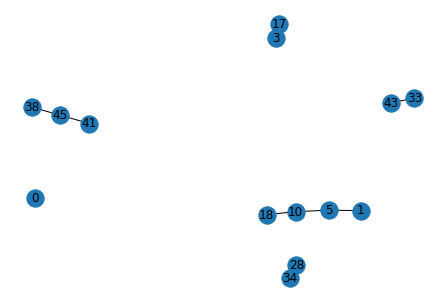

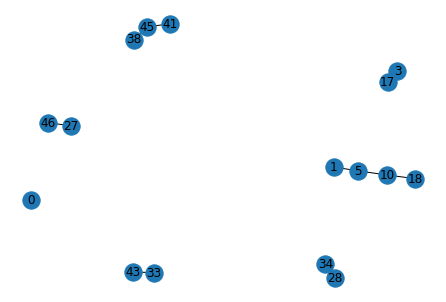

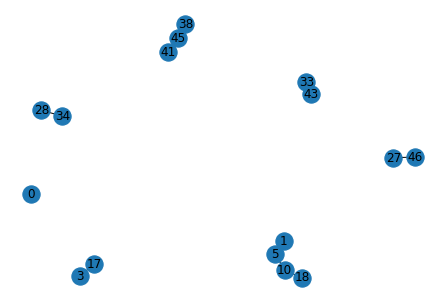

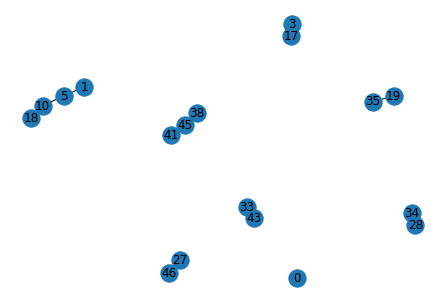

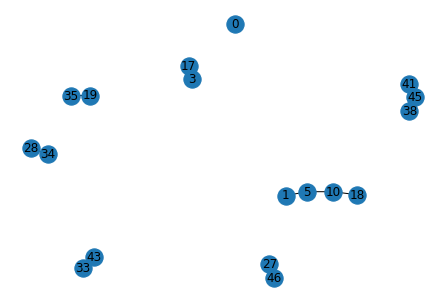

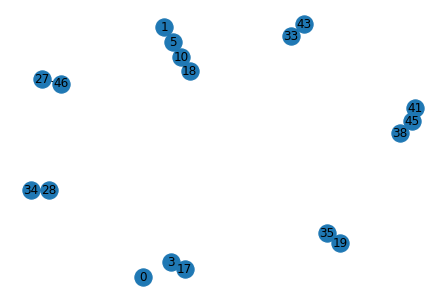

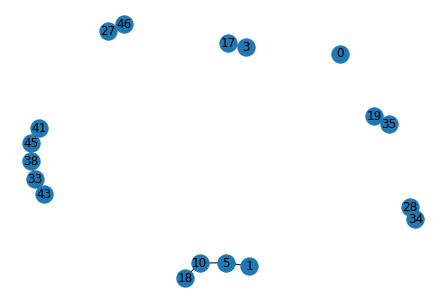

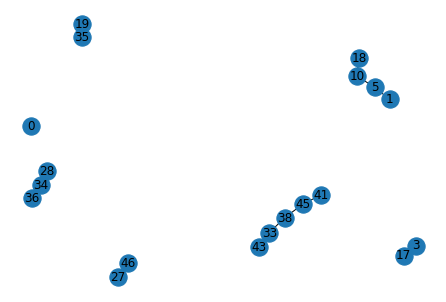

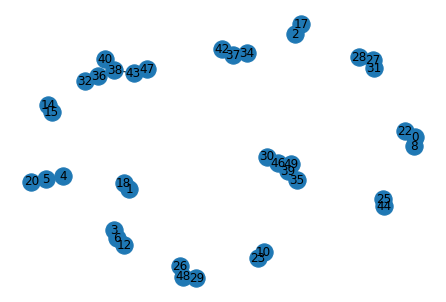

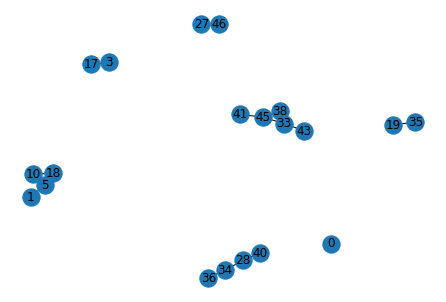

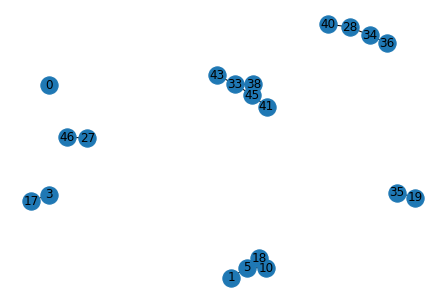

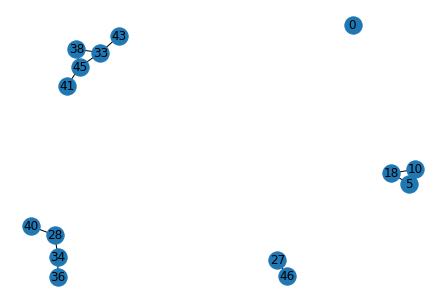

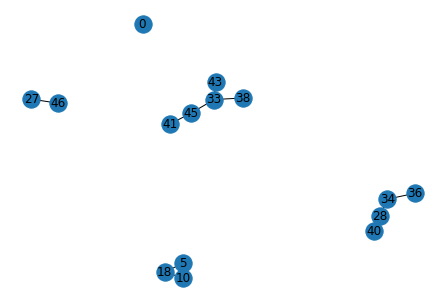

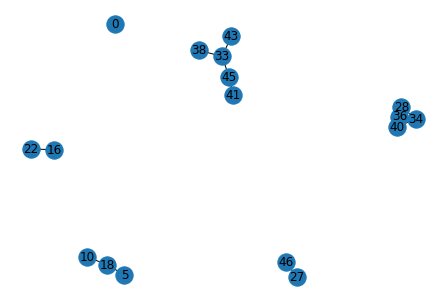

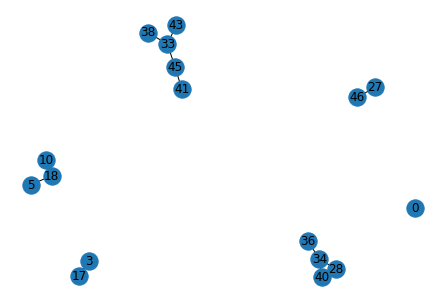

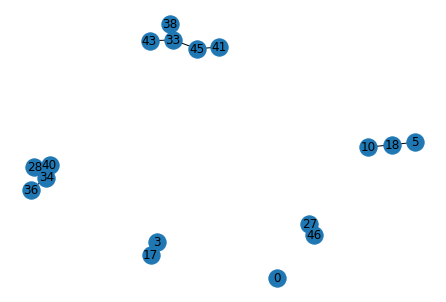

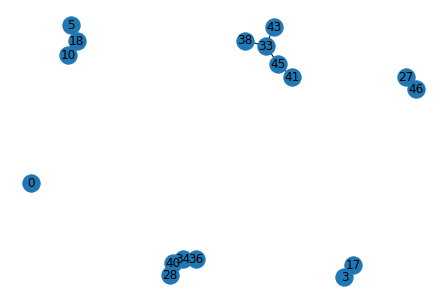

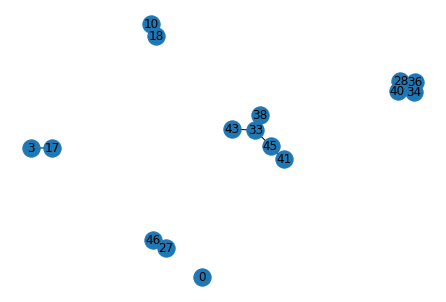

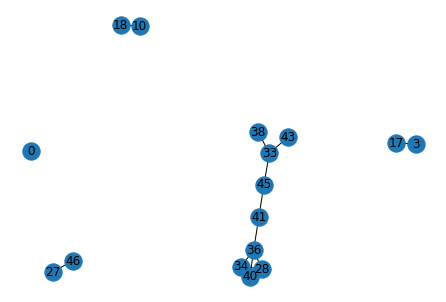

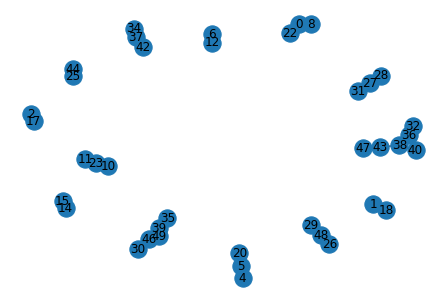

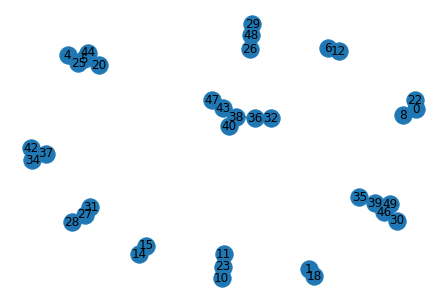

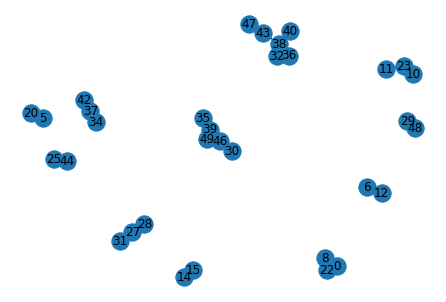

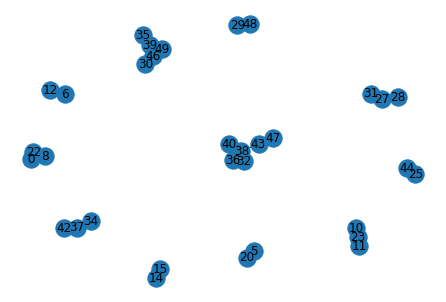

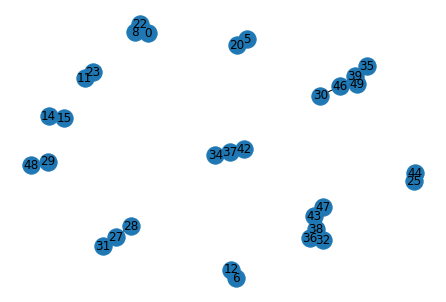

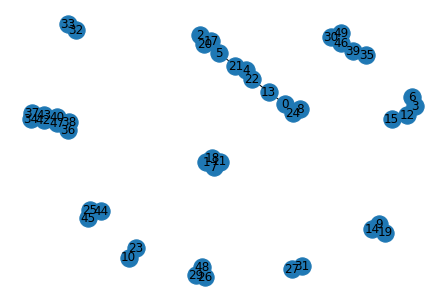

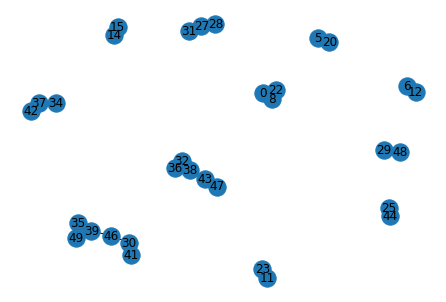

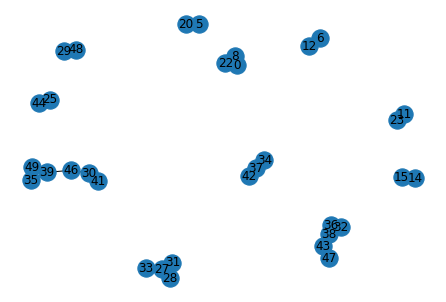

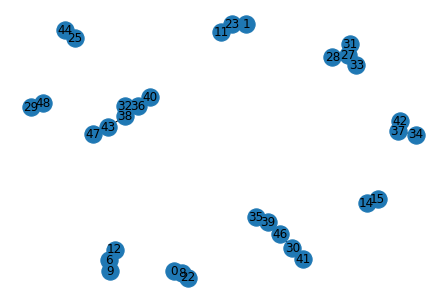

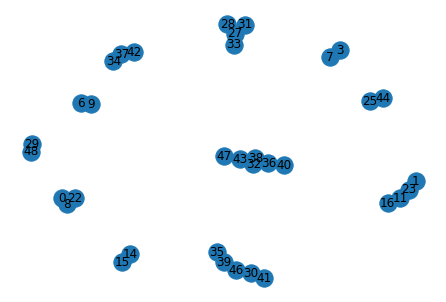

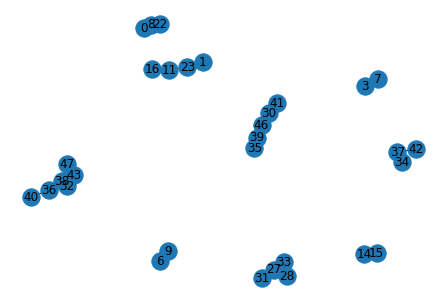

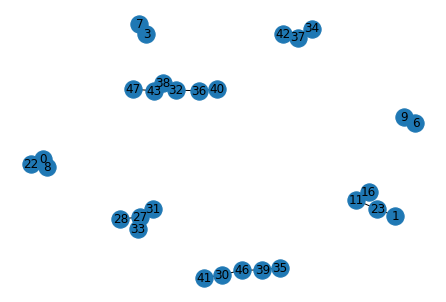

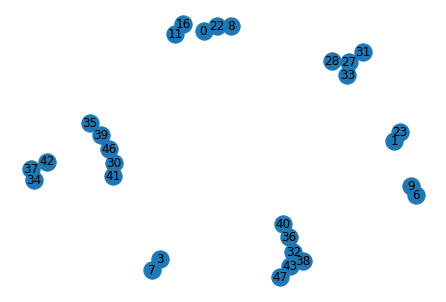

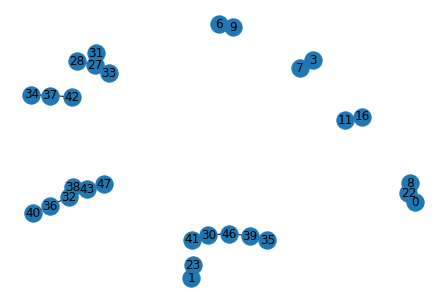

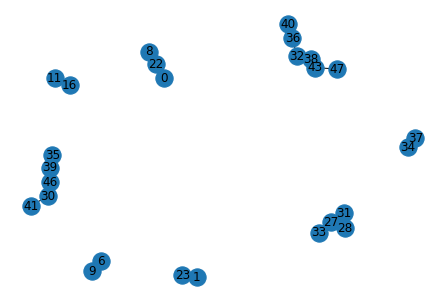

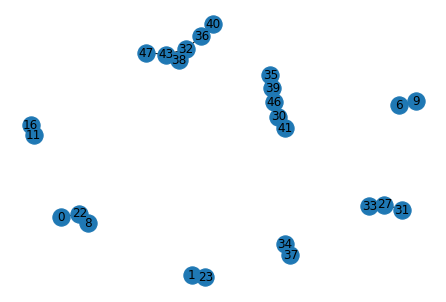

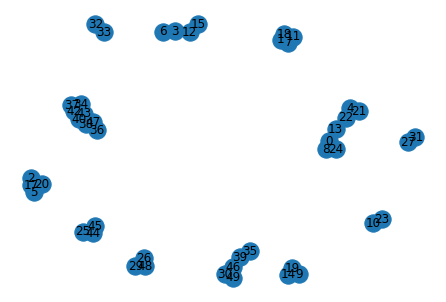

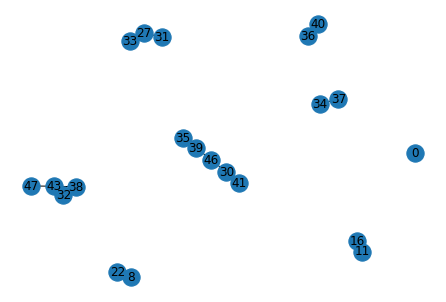

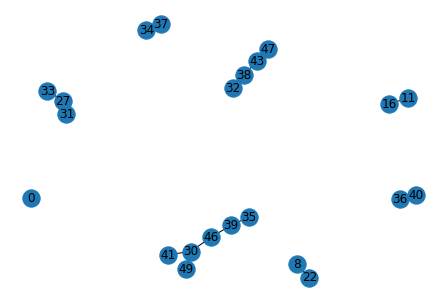

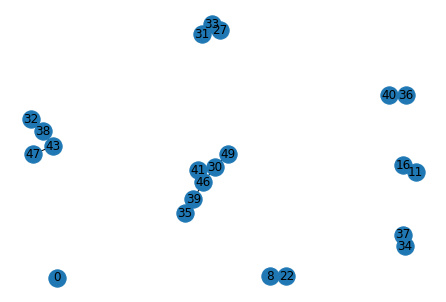

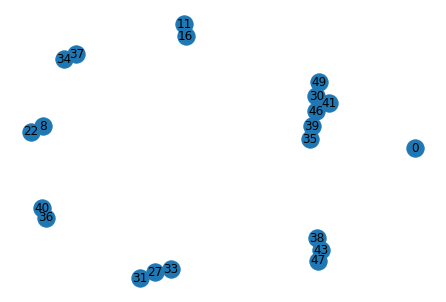

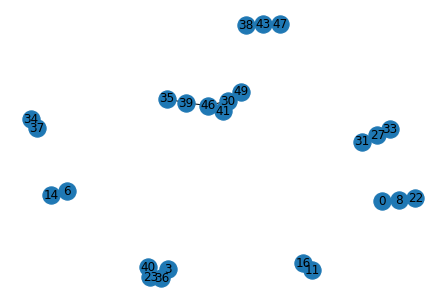

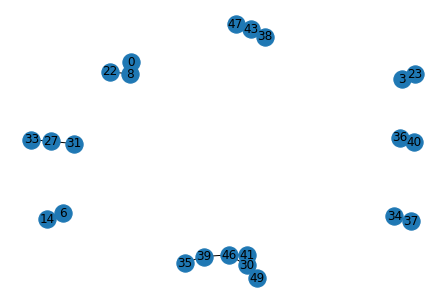

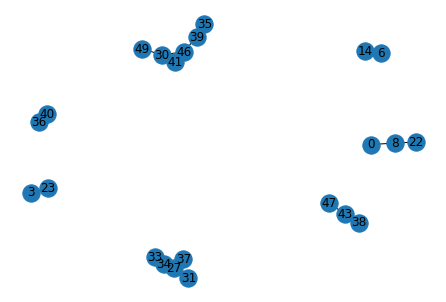

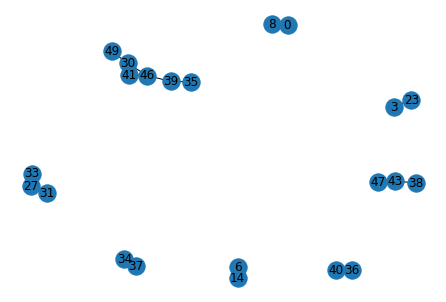

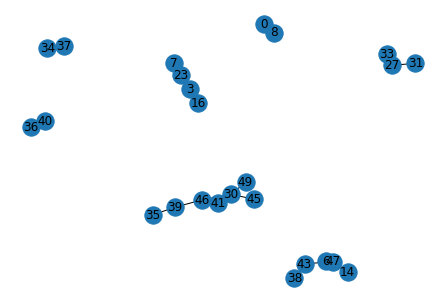

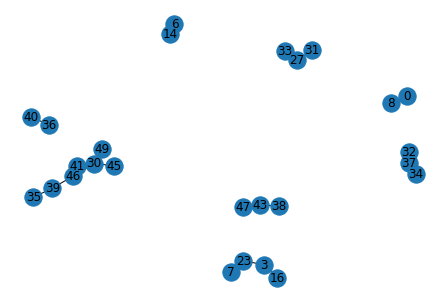

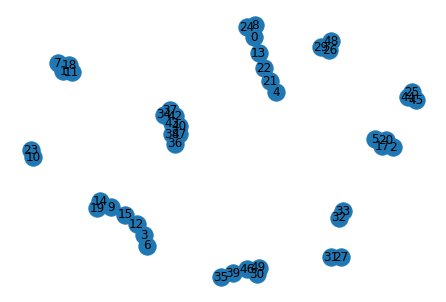

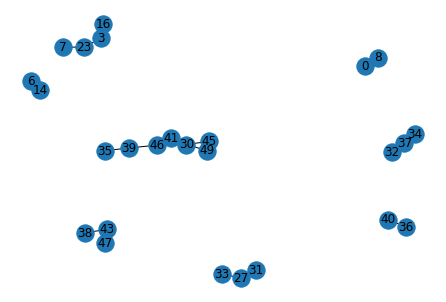

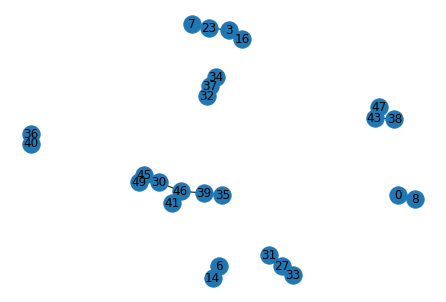

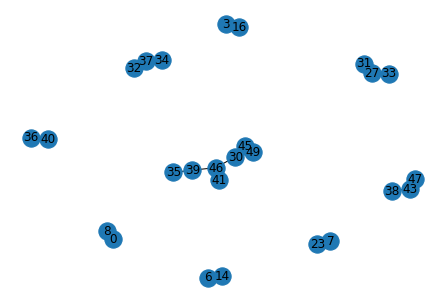

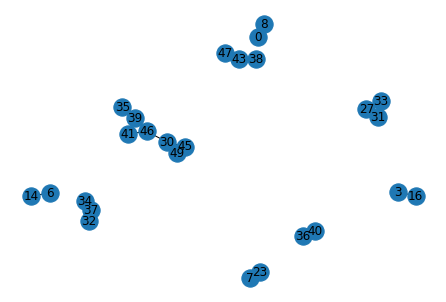

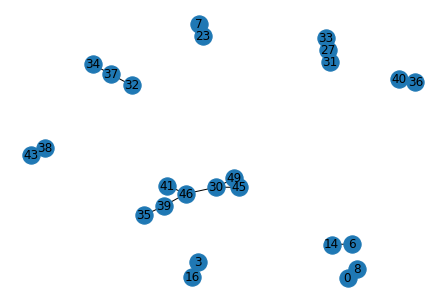

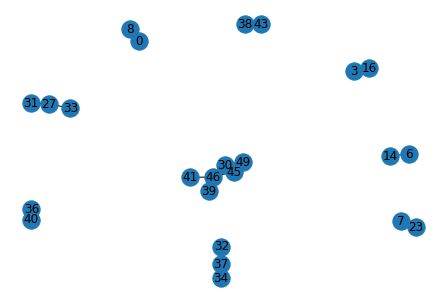

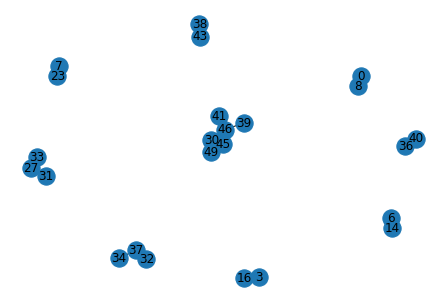

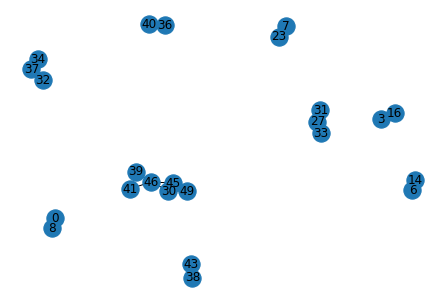

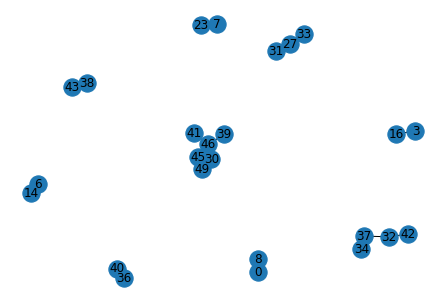

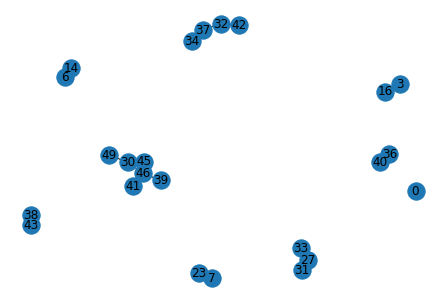

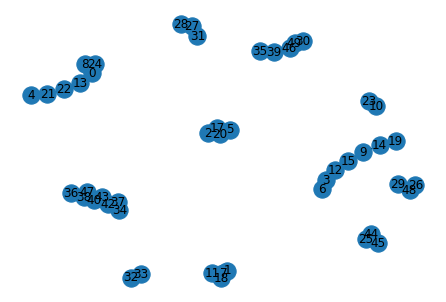

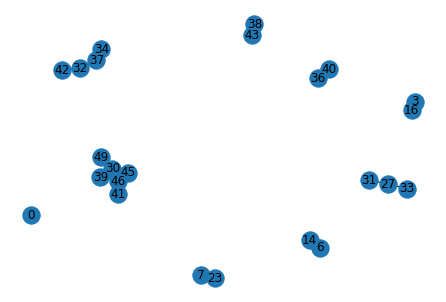

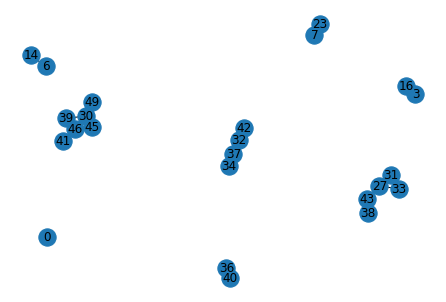

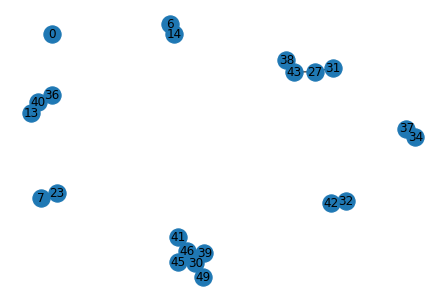

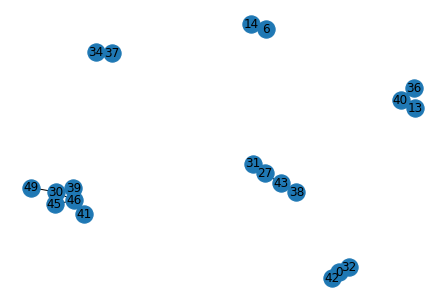

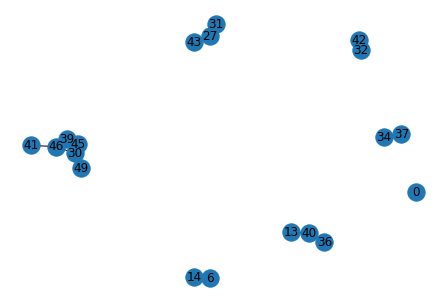

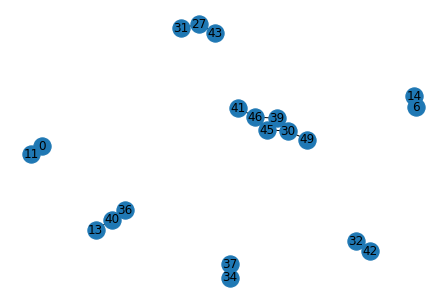

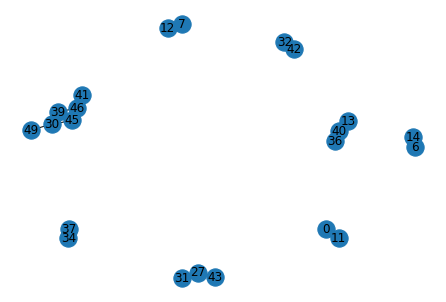

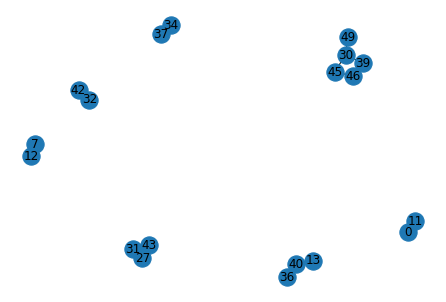

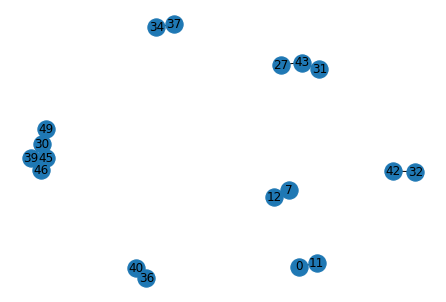

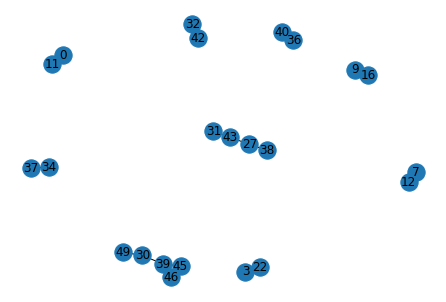

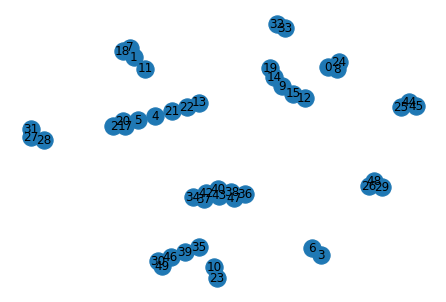

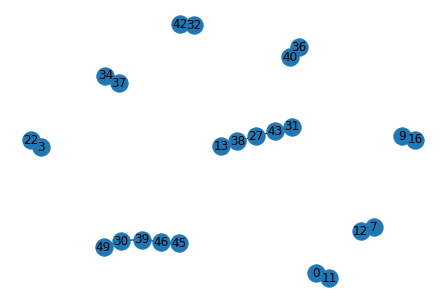

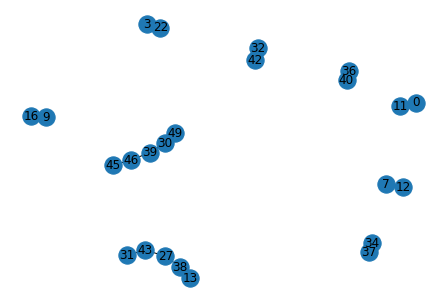

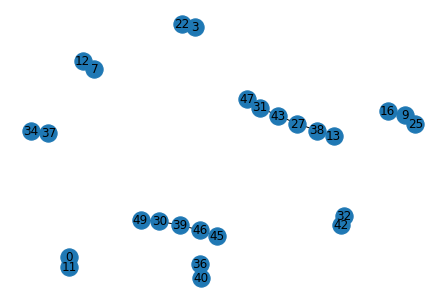

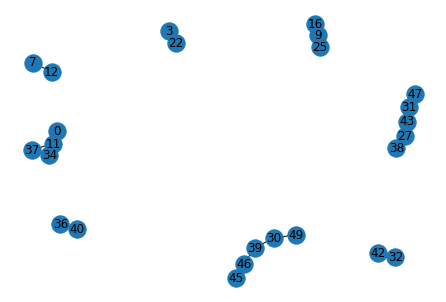

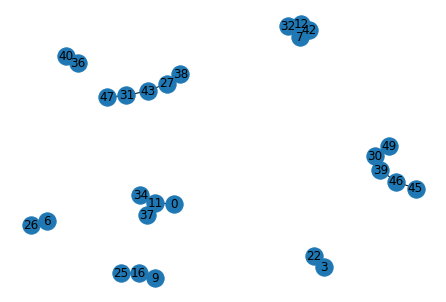

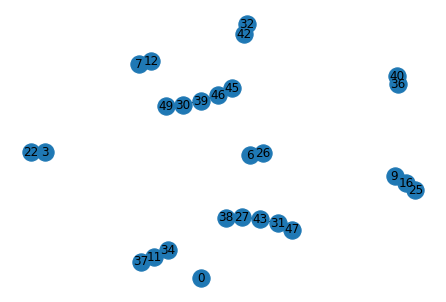

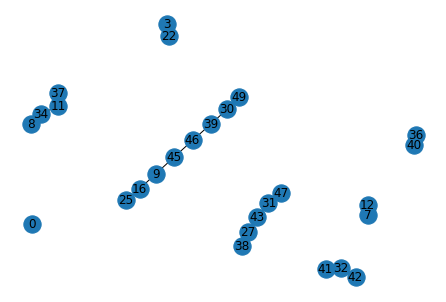

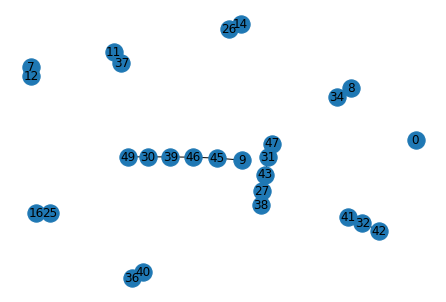

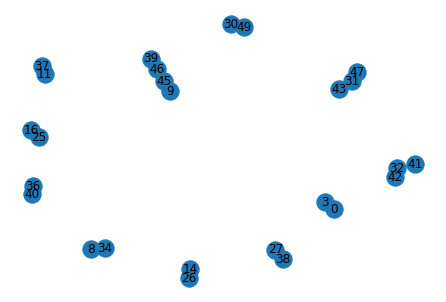

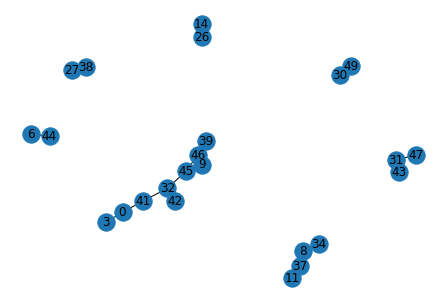

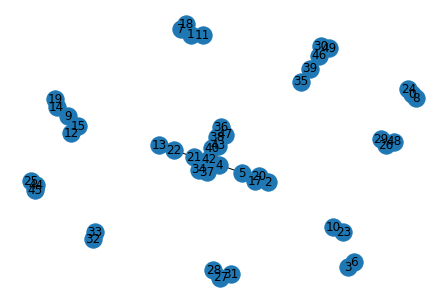

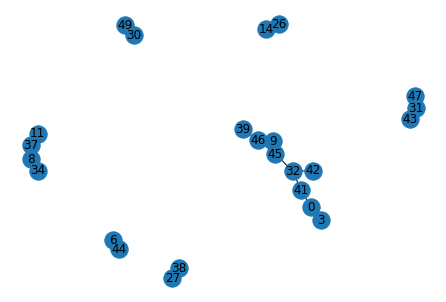

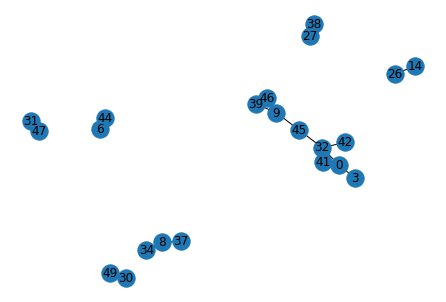

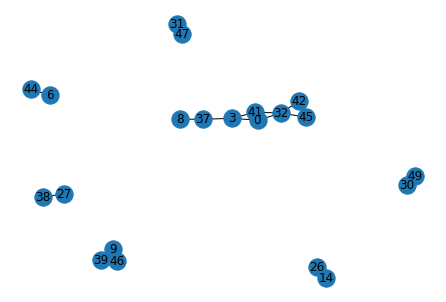

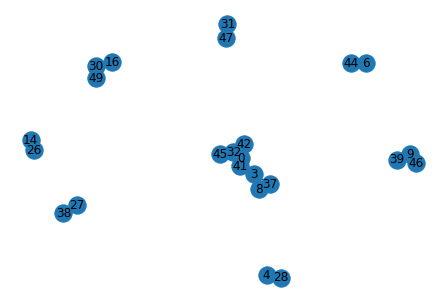

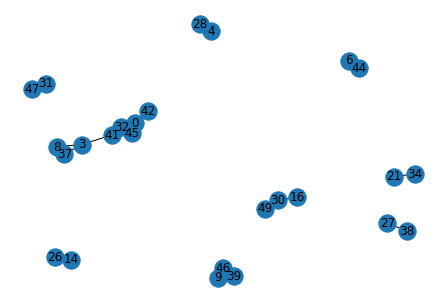

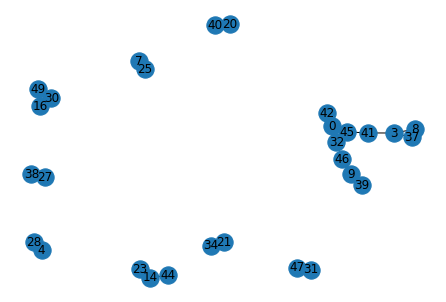

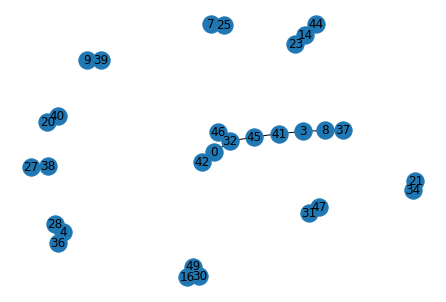

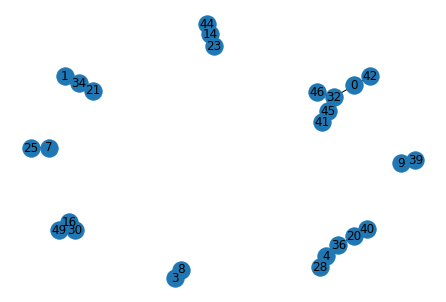

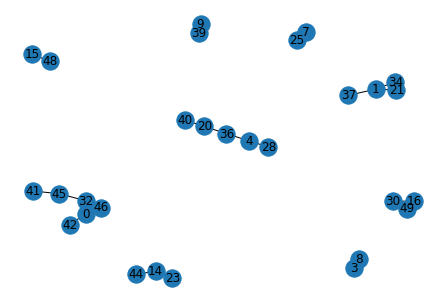

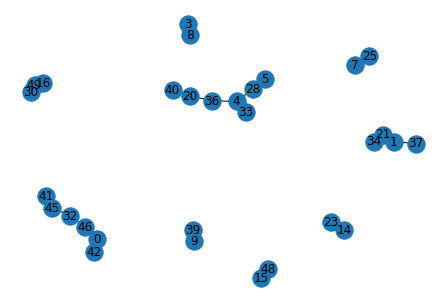

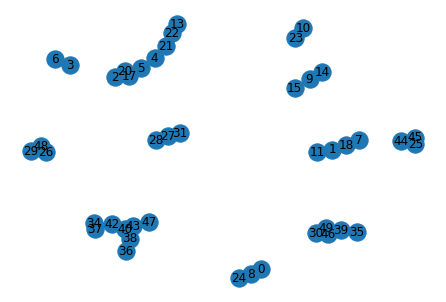

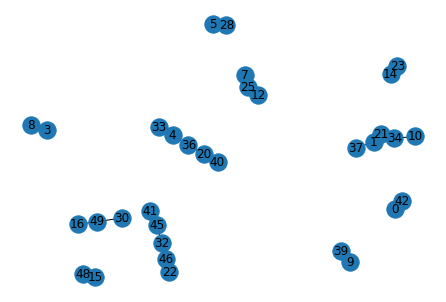

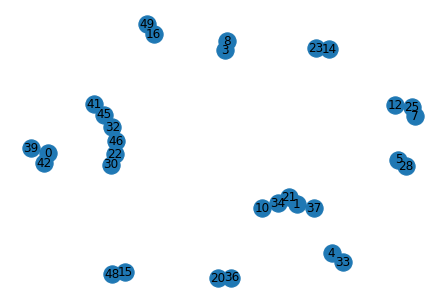

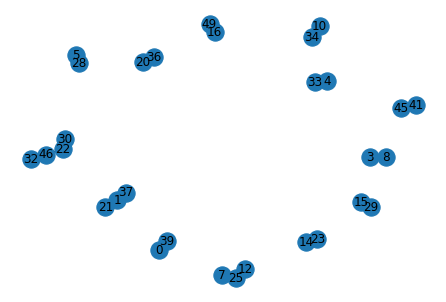

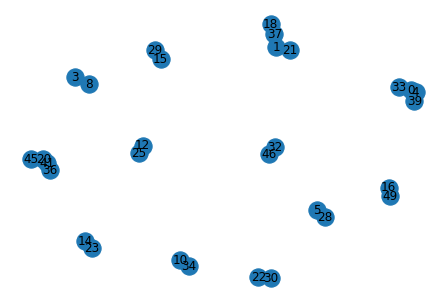

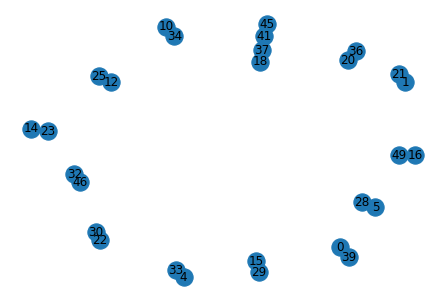

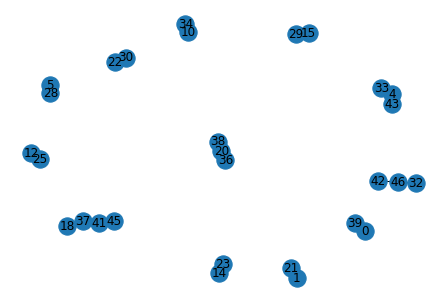

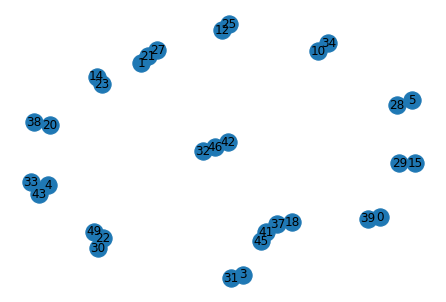

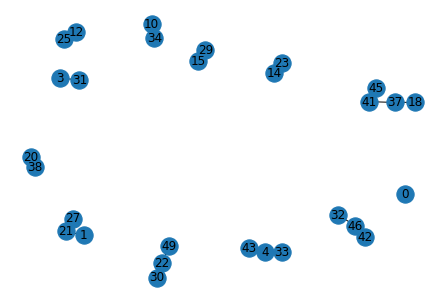

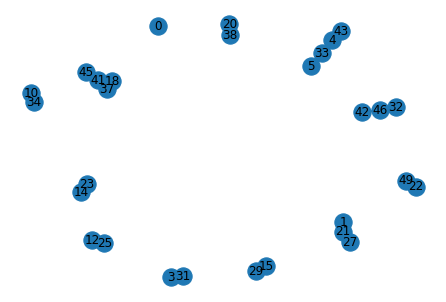

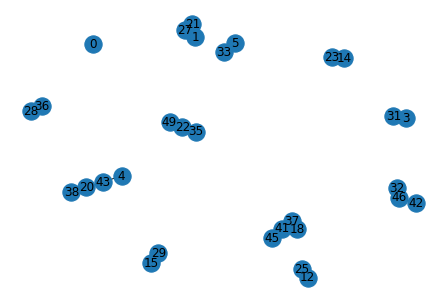

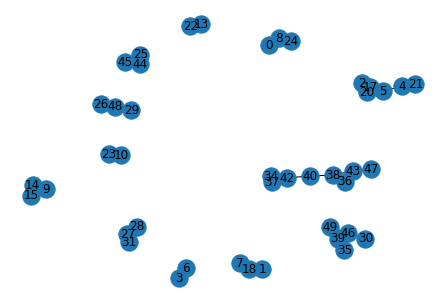

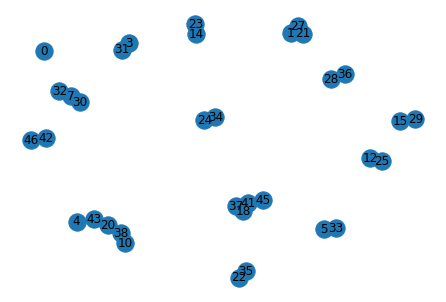

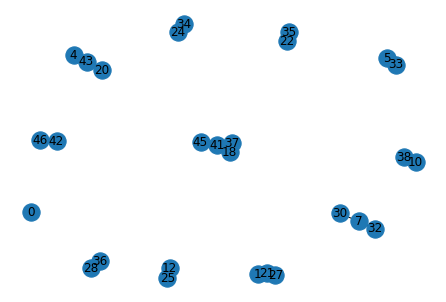

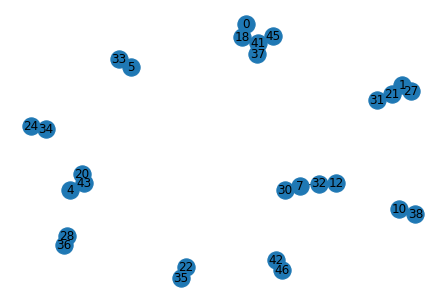

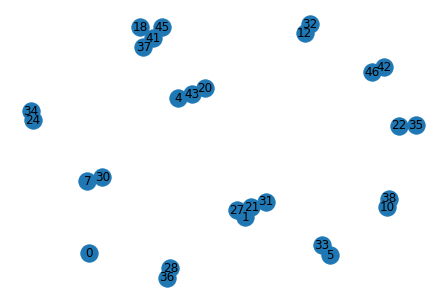

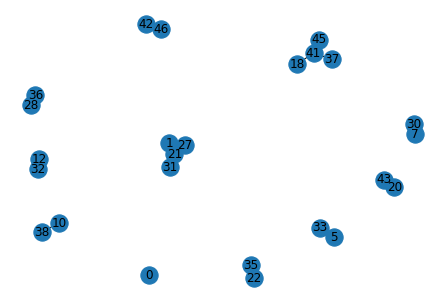

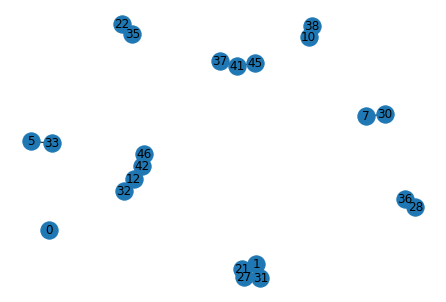

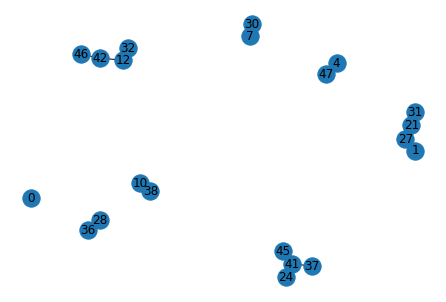

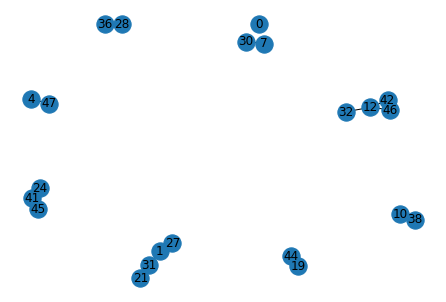

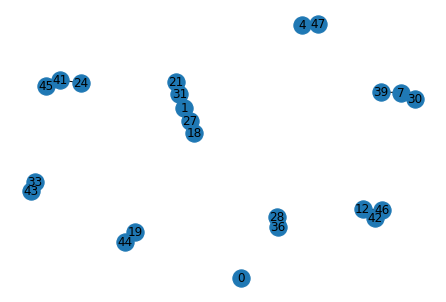

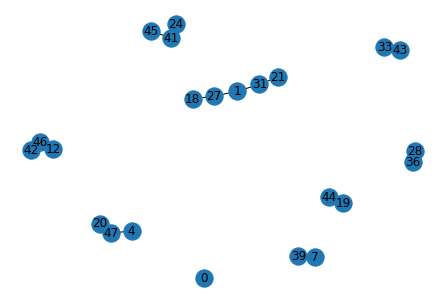

In [15]:
import os
from PIL import Image
import networkx as nx
import matplotlib.pyplot as plt

graph_dir = "/home/maria/current/work/poli/masters_project/model/SocialForces/log/0515/sim_S150A50_1001/graphs/"
filelist = os.listdir(graph_dir)

graph_list = []
for file in filelist:
    if file.endswith("adjlist"):
        graph_list.append(file)
        
graph_list.sort()

graph_list

frames = []

for graph in graph_list:
    g = 0
    g = nx.read_adjlist(graph_dir + graph)
    nx.draw(g, with_labels = True)
    plt.savefig(graph_dir + graph + ".png", dpi = 100)
    plt.show()
    new_frame = Image.open(graph_dir + graph + ".png")
    frames.append(new_frame)
        
frames[0].save(graph_dir + "../graphs.gif", format='GIF', append_images=frames[1:], save_all=True, duration=1000, loop=0)